# **Projet Big Data et Cloud Computing**

---
# Utilisation des Pipelines pour l'Analyse et la prévision Météorologique en zone CEDEAO
---

<div style="text-align: center;">
    <img src="https://media-exp1.licdn.com/dms/image/C4D0BAQHrgk0foyuJvw/company-logo_200_200/0/1559125976448?e=2159024400&v=beta&t=NtJQpfX1B73q4yoE8sy2dBTXfaGAPdmtVeu3JVe2Nf8" alt="Image description" />
</div>


---
 ###                                   Sous la supervision de:  
 ###                                   Mously DIAW,  
 ###                                   Data Scientist / ML Engineer  
###                                    Auto-entrepreneur  
---

>Rédigé par: 

> # ADAM ALASSANE Ibrahim
> # AWOUTO KOFFI Samson
> # ATCHOU ANNA AMAVIE
> # HAROUNA GOUMBANE  



# **TABLES DES MATIERES**

## 1.  **[INTRODUCTION](#1.INTRODUCTION)**
## 2.  **[EXTRACTIONS](#2.EXTRACTIONS)**
### 2.1 **[Chargement des fichiers depuis kaggle](#2.1Chargement-des-fichiers-depuis-kaggle)**
### 2. 2  **[Description des données](#desc)**
#### 2.2.1 **[Les variables de la base principale](#2.2.1Les-variables-de-la-base-principale)**
#### 2.2.2 **[Les variables de la base countries](#2.2.2Les-variables-de-la-base-countries)**
#### 2.2.3 **[Les variables de la base cities](#2.2.3Les-variables-de-la-base-cities)**
### 2.3 **[Extraction des données de la CEDEAO](#cedeao)**
## 3.  **[TRAITEMENTS](#3.TRAITEMENT-DES-DONNEES)**
## 3.1 **[Traitement des variables température moyenne, température maximale et température minimale](#temp)**
### 3.1.1 **[Vérification des doublons](#verif-doublons)**
### 3.1.2 **[Vérification des valeurs manquantes](#val_manq1)**
### 3.1.3 **[Suppression de certaines variables](#supp1)**
### 3.1.4 **[Analyse des Valeurs Manquantes et Justification de Suppression](#anal_v_mq)**
### 3.1.5 **[Justification de la suppression des variables](#just_supp)**
### 3.1.6 **[Vérification de la présence des valeurs aberrantes](#v_val_ab)**
### 3.1.7 **[Correction des valeurs aberrantes](#cor_val_ab)**
### 3.1.8 **[Vérification des traitements](#v_trait)**
### 3.1.9 **[Traitement des valeurs manquantes](#trait_v_mq)**
#### 3.1.9.1 **[Valeurs manquantes et pays](#exp_v_mq_pays)**
#### 3.1.9.2 **[Valeurs manquantes et années](#v_mq_annees)**
#### 3.1.9.3 **[Valeurs manquantes et saison](#v_mq_saison)**
#### 3.1.9.4 **[Correction des valeurs manquantes](#cor_v_mq)**
#### 3.1.9.5 **[Vérifions la présence des valeurs manquantes après correction](#ver_cor)**
## 3.2 **[Traitement de la variable précipitation](#t_var_prep)**
### 3.2.1 **[Villes et précipitations](#villes_pluies)**
## 3.3 **[Exportation des données pour l'analyse et prévision](#exportation)**
### 3.3.1 **[Exportation des bases de la CEDEAO sous format csv](#ex_csv)**
## 4.  **[ANALYSE](#ANALYSE)** 
### **[4.1 Analyse de la température moyenne par pays](#anal_temp_my)**
### **[4.2 Analyse de la température annuelle par période](#anal_temp_my_period)**
### **[4.3 Analyse de la moyenne des précipitations par pays](#anal_prep_my_pays)**
### **[4.4 Analyse des précipitations moyennes par années](#anal_prep_my_annee)**
### **[4.5 Précipitation annuelle par pays](#anal_prep_annee_pays)**
### **[4.6 Analyse de la variation annuelle de la précipitation dans la CEDEAO](#anal_prep_var_annee_cedeao)**
### **[4.7 Analyse de la température moyenne annuelle dans la CEDEAO](#anal_temp_moy_annee_cedeao)**
### **[4.8 Relation entre variation des précipitations et variations et variations des températures](#anal_rel_temp_prep)**
### **[4.9 Corrélation entre température et précipitations](#anal_cor_temp_prep)**
## 5.  **[PREVISION](#PREVISION)**
## 6.  **[CONCLUSION](#CONCLUSION )**
## 7.  **[RESSOURCES](#RESSOURCES)**

In [4]:
from IPython.display import HTML

# Code HTML et CSS pour styliser un texte
html_code = """
<style>
    .styled-text {
        font-family: "Verdana";
        font-size: 12px; /* Taille du texte normal */
        color: #333; /* Couleur du texte */
    }
    .styled-title {
        color: #1B0FF3; 
        font-weight: "bold"; 
        font-size: 16px; 
    }
    .styled-subtitle {
        color: #150EEB; 
        font-weight: bold; 
        font-size: 14px; 
    }
    .styled-sub-subtitle {
        color: #0E66EB; 
        font-weight: bold; 
        font-size: px; 
    }
    .styled-text {
        font-family: "Verdana";
        font-size: 12px; /* Taille du texte normal */
        color: #333; /* Couleur du texte */
</style>


"""

# Afficher le code HTML dans le notebook
display(HTML(html_code))


<h1 class="styled-title">1.INTRODUCTION</h1>


<p class="styled-text">
Le climat est depuis longtemps une préoccupation mondiale, en particulier à cause des effets amplifiés du réchauffement climatique, comme l'a montré l'ouragan récent en Floride, ayant causé 16 morts selon les premiers bilans. Il est clair que, sans les données satellitaires qui ont permis d'identifier la source de l'ouragan et les analyses qui ont suivi pour déterminer sa trajectoire et son ampleur, le nombre de victimes aurait pu être bien plus élevé. Ainsi, une anticipation insuffisante de ces catastrophes pourrait entraîner des conséquences dramatiques, tant humaines que matérielles.

La lutte contre le réchauffement climatique passe par des investissements dans des technologies de surveillance et d'analyse des données climatiques, essentielles pour améliorer la prise de décision. Les données climatiques présentent toutes les caractéristiques de la Big Data : elles sont massives, variées (images satellites, mesures de température, précipitations), arrivent en continu, et sont très fiables, car exemptes de biais de collecte humaine. Par exemple, en une journée, des centaines de milliers de données de divers types (images des nuages, images de l'océan, avancée du désert, données captées par des capteurs) peuvent être recueillies sur une seule zone géographique, ce qui représente un défi imposant.

Cependant, malgré les défis liés à la collecte et à l'analyse de ces données massives, la science doit apporter des solutions, ce qui est désormais possible grâce aux solutions offertes par le cloud, avec des serveurs ayant des capacités de stockage presque illimitées et des machines puissantes permettant le traitement de ces données.

Consciente des enjeux climatiques, la Communauté Économique des États de l'Afrique de l'Ouest (CEDEAO) a mis sur pied une commission chargée de l'élaboration de la Stratégie Régionale Climat (SRC). Il s'agit d'une initiative cruciale pour la région de l'Afrique de l'Ouest, particulièrement vulnérable aux effets du changement climatique. La région connaît des augmentations significatives de température, une variabilité accrue des précipitations et une fréquence plus élevée d'événements météorologiques extrêmes tels que sécheresses et inondations. Ces changements ont des répercussions directes sur l'agriculture, les ressources en eau, la santé publique et les infrastructures.
</p>

<div style="text-align: center;">
    <figure>
        <img src="https://images.theconversation.com/files/406497/original/file-20210615-19-xv665h.gif?ixlib=rb-1.1.0&q=30&auto=format&w=600&h=511&fit=crop&dpr=2" 
             alt="Image description" 
             width="300" height="300" />
        <figcaption style="font-style: italic; color: gray;">Les pays membres de la CEDEAO</figcaption>
    </figure>
</div>

<p class="styled-text">
Dans le cadre de ce projet, intitulé Utilisation des Pipelines pour l'Analyse et la Prévision Météorologique en zone CEDEAO, un processus d'extraction, de traitement et de visualisation des données climatiques a été mis en place pour éclairer les décisions publiques face aux impacts du changement climatique (principalement les sécheresses et les inondations au Sahel). Ce projet vise à fournir une visualisation dynamique, sur une carte, des régions les plus touchées par divers événements climatiques, notamment les zones les plus chaudes et les plus inondées. Pour atteindre cet objectif, il est essentiel de collecter des données provenant de sources fiables, puis de les traiter en temps réel. Parallèlement, l'hébergement de ces données dans le cloud est crucial pour garantir leur accessibilité et leur sécurité. Ce système intégrant la collecte, le traitement et l'hébergement des données, appelé processus de construction d'un pipeline ETL, facilitera une visualisation en temps réel des données climatiques, améliorant ainsi la réactivité et l’efficacité des politiques publiques dans la région.
</p>

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h1 class="styled-title">2.EXTRACTIONS</h1>


<p class = "styled-text">Cette partie est scindée en deux étapes. La première étape consiste à aller chercher les données sur kaggle. Et lors la deuxième étape, nous extrayerons les données de la CEDEAO car notre étude portera sur cette organisation régionale.</p>

<h2 class ="styled-subtitle">2.1Chargement des fichiers depuis kaggle</h2>


<p class = "styled-text">Pour accéder aux données, il est important d'avoir un compte kaggle et de disposer de sa clé. Vous devez aussi avoir kaggle installer sur la machine. Sinon, exécuter install kaggle.</p>

In [11]:
# Chargement des modules 
import polars as pl
import os
import json
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Informations d'authentification pour Kaggle
api_token = {
    "username": "Votre_Nom_D'utilisateur",
    "key": "Votre_clé_API"
}

# Sauvegarder le fichier kaggle.json dans le répertoire de travail courant
with open('kaggle.json', 'w') as file:
    json.dump(api_token, file)

# Définir le répertoire de configuration de Kaggle
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()

# Assurez-vous que les permissions sont correctes
os.chmod('kaggle.json', 0o600)

# Utiliser la bibliothèque Kaggle pour télécharger un fichier
# Exemple : Remplacez 'dataset-owner/dataset-name' par l'identifiant du dataset que vous souhaitez télécharger
!kaggle datasets download -d guillemservera/global-daily-climate-data
# Extraction des fiichiers Zipper
with zipfile.ZipFile('global-daily-climate-data.zip', 'r') as zip_ref:
    zip_ref.extractall('global-daily-climate-data')
files = os.listdir('global-daily-climate-data')
print(files)


  0%|          | 0.00/213M [00:00<?, ?B/s]
  0%|          | 1.00M/213M [00:00<02:03, 1.80MB/s]
  1%|1         | 3.00M/213M [00:00<00:44, 4.98MB/s]
  2%|2         | 5.00M/213M [00:00<00:28, 7.71MB/s]
  3%|3         | 7.00M/213M [00:00<00:20, 10.4MB/s]
  4%|4         | 9.00M/213M [00:01<00:17, 12.1MB/s]
  5%|5         | 11.0M/213M [00:01<00:15, 13.5MB/s]
  6%|6         | 13.0M/213M [00:01<00:16, 12.5MB/s]
  7%|7         | 15.0M/213M [00:01<00:17, 11.6MB/s]
  8%|7         | 17.0M/213M [00:01<00:17, 11.9MB/s]
  9%|8         | 19.0M/213M [00:01<00:17, 11.5MB/s]
 10%|9         | 21.0M/213M [00:02<00:18, 10.9MB/s]
 11%|#         | 23.0M/213M [00:02<00:20, 9.63MB/s]
 11%|#1        | 24.0M/213M [00:02<00:22, 8.87MB/s]
 12%|#1        | 25.0M/213M [00:02<00:23, 8.53MB/s]
 12%|#2        | 26.0M/213M [00:02<00:24, 8.14MB/s]
 13%|#2        | 27.0M/213M [00:03<00:29, 6.63MB/s]
 13%|#3        | 28.0M/213M [00:03<00:28, 6.80MB/s]
 14%|#3        | 29.0M/213M [00:03<00:26, 7.27MB/s]
 14%|#4        | 30.

Dataset URL: https://www.kaggle.com/datasets/guillemservera/global-daily-climate-data
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)

['cities.csv', 'countries.csv', 'daily_weather.parquet']


<p class = "class = "styled-text"">Voilà qui est fait! Les données se trouvent enfin sur la machine.   
Il suffit de les importer.</p>

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

In [5]:

# Chemin vers votre fichier Parquet
chemin_parquet = "global-daily-climate-data/daily_weather.parquet"

# Lire le fichier Parquet avec Polars
df = pl.read_parquet(chemin_parquet)

# Afficher les premières lignes du DataFrame
print(df.head())



shape: (5, 15)
┌────────────┬───────────┬────────────────┬────────┬───┬───────────────┬───────────────┬───────────────┬───────────────┐
│ station_id ┆ city_name ┆ date           ┆ season ┆ … ┆ peak_wind_gus ┆ avg_sea_level ┆ sunshine_tota ┆ __index_level │
│ ---        ┆ ---       ┆ ---            ┆ ---    ┆   ┆ t_kmh         ┆ _pres_hpa     ┆ l_min         ┆ _0__          │
│ cat        ┆ cat       ┆ datetime[ns]   ┆ cat    ┆   ┆ ---           ┆ ---           ┆ ---           ┆ ---           │
│            ┆           ┆                ┆        ┆   ┆ f64           ┆ f64           ┆ f64           ┆ i64           │
╞════════════╪═══════════╪════════════════╪════════╪═══╪═══════════════╪═══════════════╪═══════════════╪═══════════════╡
│ 41515      ┆ Asadabad  ┆ 1957-07-01     ┆ Summer ┆ … ┆ null          ┆ null          ┆ null          ┆ 0             │
│            ┆           ┆ 00:00:00       ┆        ┆   ┆               ┆               ┆               ┆               │
│ 41515      ┆ As

In [6]:
import polars as pl

# Chemin vers votre fichier CSV
chemin_cities = "global-daily-climate-data/cities.csv"

# Lire le fichier CSV avec Polars
df_cities = pl.read_csv(chemin_cities)

# Afficher les premières lignes du DataFrame
print(df_cities.head())



shape: (5, 8)
┌────────────┬────────────┬─────────────┬────────────┬──────┬──────┬───────────┬───────────┐
│ station_id ┆ city_name  ┆ country     ┆ state      ┆ iso2 ┆ iso3 ┆ latitude  ┆ longitude │
│ ---        ┆ ---        ┆ ---         ┆ ---        ┆ ---  ┆ ---  ┆ ---       ┆ ---       │
│ str        ┆ str        ┆ str         ┆ str        ┆ str  ┆ str  ┆ f64       ┆ f64       │
╞════════════╪════════════╪═════════════╪════════════╪══════╪══════╪═══════════╪═══════════╡
│ 41515      ┆ Asadabad   ┆ Afghanistan ┆ Kunar      ┆ AF   ┆ AFG  ┆ 34.866    ┆ 71.150005 │
│ 38954      ┆ Fayzabad   ┆ Afghanistan ┆ Badakhshan ┆ AF   ┆ AFG  ┆ 37.129761 ┆ 70.579247 │
│ 41560      ┆ Jalalabad  ┆ Afghanistan ┆ Nangarhar  ┆ AF   ┆ AFG  ┆ 34.441527 ┆ 70.436103 │
│ 38947      ┆ Kunduz     ┆ Afghanistan ┆ Kunduz     ┆ AF   ┆ AFG  ┆ 36.727951 ┆ 68.87253  │
│ 38987      ┆ Qala i Naw ┆ Afghanistan ┆ Badghis    ┆ AF   ┆ AFG  ┆ 34.983    ┆ 63.1333   │
└────────────┴────────────┴─────────────┴────────────┴──

In [7]:
import polars as pl

# Chemin vers votre fichier CSV
chemin_countries = "global-daily-climate-data/countries.csv"

# Lire le fichier CSV avec Polars
df_countries = pl.read_csv(chemin_countries)

# Afficher les premières lignes du DataFrame
print(df_countries.head())



shape: (5, 11)
┌────────────────┬────────────────┬──────┬──────┬───┬─────────────┬─────────────┬──────────────────────┬───────────┐
│ country        ┆ native_name    ┆ iso2 ┆ iso3 ┆ … ┆ capital_lat ┆ capital_lng ┆ region               ┆ continent │
│ ---            ┆ ---            ┆ ---  ┆ ---  ┆   ┆ ---         ┆ ---         ┆ ---                  ┆ ---       │
│ str            ┆ str            ┆ str  ┆ str  ┆   ┆ f64         ┆ f64         ┆ str                  ┆ str       │
╞════════════════╪════════════════╪══════╪══════╪═══╪═════════════╪═════════════╪══════════════════════╪═══════════╡
│ Afghanistan    ┆ افغانستان      ┆ AF   ┆ AFG  ┆ … ┆ 34.526011   ┆ 69.177684   ┆ Southern and Central ┆ Asia      │
│                ┆                ┆      ┆      ┆   ┆             ┆             ┆ Asia                 ┆           │
│ Albania        ┆ Shqipëria      ┆ AL   ┆ ALB  ┆ … ┆ 41.326873   ┆ 19.818791   ┆ Southern Europe      ┆ Europe    │
│ Algeria        ┆ الجزائر        ┆ DZ   ┆ DZA  ┆

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h2 class = "styled-subtitle"><a id="desc">2.2 Description des données</a></h2>

<h3 id = "bp" class = "styles sub-subtitle">2.2.1Les variables de la base principale</h3>


#### Informations Générales
- **Nombre de lignes** : 27,635,763
- **Nombre de colonnes** : 15

#### Schéma des Colonnes
| Nom de la Colonne          | Type de Données                                     | Description                                        |
|----------------------------|-----------------------------------------------------|----------------------------------------------------|
| `station_id`               | Categorical                                         | Identifiant de la station, ordonné physiquement    |
| `city_name`                | Categorical                                         | Nom de la ville, ordonné physiquement              |
| `date`                     | Datetime (ns)                                      | Date et heure des observations, sans fuseau horaire |
| `season`                   | Categorical                                         | Saison de l'année, ordonné physiquement             |
| `avg_temp_c`               | Float64                                            | Température moyenne en degrés Celsius               |
| `min_temp_c`               | Float64                                            | Température minimale en degrés Celsius              |
| `max_temp_c`               | Float64                                            | Température maximale en degrés Celsius              |
| `precipitation_mm`         | Float64                                            | Précipitation en millimètres                        |
| `snow_depth_mm`            | Float64                                            | Profondeur de la neige en millimètres               |
| `avg_wind_dir_deg`         | Float64                                            | Direction du vent en degrés                         |
| `avg_wind_speed_kmh`       | Float64                                            | Vitesse moyenne du vent en km/h                    |
| `peak_wind_gust_kmh`       | Float64                                            | Rafale de vent maximale en km/h                     |
| `avg_sea_level_pres_hpa`   | Float64                                            | Pression au niveau de la mer en hPa                |
| `sunshine_total_min`       | Float64                                            | Total d'ensoleillement en minutes                   |
| `__index_level_0__


<h3 id = "bcount" class = "styled sub-subtitle">2.2.2Les variables de la base countries</h3>


#### Informations Générales
- **Nom de la base** : df_countries
- **Nombre de lignes** : 214
- **Nombre de colonnes** : 11

# Schéma des Colonnes

| Nom de la Colonne     | Type de Données | Description                               |
|-----------------------|-----------------|-------------------------------------------|
| `country`             | String          | Nom du pays                               |
| `native_name`         | String          | Nom natif du pays                         |
| `iso2`                | String          | Code ISO à deux lettres                   |
| `iso3`                | String          | Code ISO à trois lettres                  |
| `population`          | Double          | Population totale du pays                 |
| `area`                | Double          | Superficie du pays en kilomètres carrés   |
| `capital`             | String          | Nom de la capitale                        |
| `capital_lat`         | Double          | Latitude de la capitale                   |
| `capital_lng`         | Double          | Longitude de la capitale                  |
| `region`              | String          | Région géographique                       |
| `continent`           | String          | Continent auquel appartient le pays       |


<h3 id = "bcities" class ="styled-sub-subtitle">2.2.3Les variables de la base cities</h3>


#### Informations Générales
- **Nombre de lignes** : 1,245
- **Nombre de colonnes** : 8

#### Schéma des Colonnes
| Nom de la Colonne   | Type de Données | Description                             |
|---------------------|------------------|-----------------------------------------|
| `station_id`        | String           | Identifiant unique de la station        |
| `city_name`         | String           | Nom de la ville associée à la station   |
| `country`           | String           | Nom du pays où se trouve la ville      |
| `state`             | String           | État ou province où se situe la ville   |
| `iso2`              | String           | Code ISO à deux lettres (identifiant pays) |
| `iso3`              | String           | Code ISO à trois lettres (identifiant pays) |
| `latitude`          | Float64          | Latitude géographique de la ville      |
| `longitude`         | Float64          | Longitude géographique de la ville     |

#### Observations
Ces bases de données sont complémentaires. df fournit des données météorologiques détaillées par station et par date,  df_cities offre des informations géographiques et contextuelles pour chaque station et df_countries donne des informations caractéristiques des pays. Nous pourrions  potentiellement utiliser df_cities pour enrichir les données de df en ajoutant des informations sur la ville, le pays, ou d'autres attributs pour effectuer des analyses géographiques ou démographiques.




**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h1 class = "styled-title>3. TRAITEMENT DES DONNÉES</h1>

<h2  class = "styled-subtitle"><a id="cedeao">2.3 Extraction des données de la CEDEAO</a></h2>

Étant donné que notre analyse est orientée vers les pays de la CEDEAO, nous allons d'abord extraire les données des pays de cette région à partir de la base df_cities. Ensuite, nous fusionnerons cette base filtrée avec la base df, en nous basant sur les variables station_id et city_name, qui sont communes aux deux ensembles de données.

In [8]:
import polars as pl

# Liste des pays d'Afrique de l'Ouest
pays_afrique_ouest = [
    "Benin", "Burkina Faso", "Cape Verde", "Ivory Coast", 
    "The Gambia", "Ghana", "Guinea", "Guinea Bissau", 
    "Liberia", "Mali", "Niger", "Nigeria", 
    "Senegal", "Sierra Leone", "Togo"
]

# Filtrer le DataFrame pour obtenir uniquement les pays d'Afrique de l'Ouest
df_afrique_ouest = df_cities.filter(pl.col('country').is_in(pays_afrique_ouest))

# Afficher les premières lignes du DataFrame filtré
print(df_afrique_ouest.head())


shape: (5, 8)
┌────────────┬────────────────┬──────────────┬─────────┬──────┬──────┬───────────┬───────────┐
│ station_id ┆ city_name      ┆ country      ┆ state   ┆ iso2 ┆ iso3 ┆ latitude  ┆ longitude │
│ ---        ┆ ---            ┆ ---          ┆ ---     ┆ ---  ┆ ---  ┆ ---       ┆ ---       │
│ str        ┆ str            ┆ str          ┆ str     ┆ str  ┆ str  ┆ f64       ┆ f64       │
╞════════════╪════════════════╪══════════════╪═════════╪══════╪══════╪═══════════╪═══════════╡
│ 65338      ┆ Abomey         ┆ Benin        ┆ Zou     ┆ BJ   ┆ BEN  ┆ 7.1904    ┆ 1.989997  │
│ 65344      ┆ Cotonou        ┆ Benin        ┆ Ouémé   ┆ BJ   ┆ BEN  ┆ 6.400009  ┆ 2.519991  │
│ 65319      ┆ Natitingou     ┆ Benin        ┆ Atakora ┆ BJ   ┆ BEN  ┆ 10.320415 ┆ 1.389982  │
│ 65330      ┆ Parakou        ┆ Benin        ┆ Borgou  ┆ BJ   ┆ BEN  ┆ 9.34001   ┆ 2.620036  │
│ 65510      ┆ Bobo Dioulasso ┆ Burkina Faso ┆ Houet   ┆ BF   ┆ BFA  ┆ 11.179975 ┆ -4.289981 │
└────────────┴────────────────┴─────

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

**Fusions des deux bases**

In [9]:
import polars as pl


# Convertir city_name en str dans df
df = df.with_columns(pl.col("city_name").cast(pl.Utf8))
df = df.with_columns(pl.col("station_id").cast(pl.Utf8))

# Maintenant, refais la jointure
pays_CEDEAO = df_afrique_ouest.join(
    df,
    on=["station_id", "city_name"],  # Colonnes sur lesquelles fusionner
    how="inner"  # Type de jointure
)

# Suppression des doublons après la jointure
pays_CEDEAO = pays_CEDEAO.select(
    pl.col("station_id"),
    pl.col("city_name"),
    *[col for col in df_afrique_ouest.columns if col not in ['station_id', 'city_name']],
    *[col for col in df.columns if col not in ['station_id', 'city_name']]
)

# Afficher le DataFrame fusionné
print("DataFrame fusionné :")
print(pays_CEDEAO)


DataFrame fusionné :
shape: (1_185_080, 21)
┌────────────┬───────────┬─────────┬────────┬───┬─────────────────┬─────────────────┬─────────────────┬────────────────┐
│ station_id ┆ city_name ┆ country ┆ state  ┆ … ┆ peak_wind_gust_ ┆ avg_sea_level_p ┆ sunshine_total_ ┆ __index_level_ │
│ ---        ┆ ---       ┆ ---     ┆ ---    ┆   ┆ kmh             ┆ res_hpa         ┆ min             ┆ 0__            │
│ str        ┆ str       ┆ str     ┆ str    ┆   ┆ ---             ┆ ---             ┆ ---             ┆ ---            │
│            ┆           ┆         ┆        ┆   ┆ f64             ┆ f64             ┆ f64             ┆ i64            │
╞════════════╪═══════════╪═════════╪════════╪═══╪═════════════════╪═════════════════╪═════════════════╪════════════════╡
│ 65338      ┆ Abomey    ┆ Benin   ┆ Zou    ┆ … ┆ null            ┆ null            ┆ null            ┆ 0              │
│ 65338      ┆ Abomey    ┆ Benin   ┆ Zou    ┆ … ┆ null            ┆ null            ┆ null            ┆ 1    


Ainsi nous obtenons notre base nommé pays_CEDEAO 
#### Détails de la Base

- **Nombre de lignes** : 1 185 080
- **Nombre de colonnes** : 21

#### Schéma des Colonnes

| Nom de la colonne               | Type         | Description                                                           |
|----------------------------------|--------------|-----------------------------------------------------------------------|
| `station_id`                    | String       | Identifiant unique de la station de mesure.                          |
| `city_name`                     | String       | Nom de la ville où se trouve la station.                             |
| `date`                          | Datetime     | Date de l'enregistrement des données, avec une précision en nanosecondes. |
| `season`                        | Categorical  | Saison à laquelle les données se rapportent (ex: hiver, printemps).  |
| `avg_temp_c`                   | Float64      | Température moyenne en degrés Celsius.                               |
| `min_temp_c`                   | Float64      | Température minimale en degrés Celsius.                              |
| `max_temp_c`                   | Float64      | Température maximale en degrés Celsius.                              |
| `precipitation_mm`             | Float64      | Précipitation enregistrée en millimètres.                           |
| `snow_depth_mm`                | Float64      | Profondeur de la neige en millimètres.                               |
| `avg_wind_dir_deg`             | Float64      | Direction moyenne du vent en degrés.                                 |
| `avg_wind_speed_kmh`            | Float64      | Vitesse moyenne du vent en kilomètres par heure.                     |
| `peak_wind_gust_kmh`           | Float64      | Rafale de vent maximale en kilomètres par heure.                     |
| `avg_sea_level_pres_hpa`       | Float64      | Pression moyenne au niveau de la mer en hPa (hectopascals).        |
| `sunshine_total_min`           | Float64      | Total des minutes d'ensoleillement.                                  |
| `__index_level_0__`            | Int64        | Niveau d'index, utilisé pour identifier les enregistrements de manière unique. |




**renomination des variables** 

In [10]:
# Mettre le nom des variables en français
noms_colonnes_francais = {
    'station_id': 'id_station',
    'city_name': 'nom_ville',
    'date': 'date',
    'season': 'saison',
    'avg_temp_c': 'temp_moyenne_c',
    'min_temp_c': 'temp_min_c',
    'max_temp_c': 'temp_max_c',
    'precipitation_mm': 'precipitation_mm',
    'snow_depth_mm': 'profondeur_neige_mm',
    'avg_wind_dir_deg': 'direction_vent_moyenne_deg',
    'avg_wind_speed_kmh': 'vitesse_vent_moyenne_kmh',
    'peak_wind_gust_kmh': 'rafale_vent_max_kmh',
    'avg_sea_level_pres_hpa': 'pression_niveau_mer_hpa',
    'sunshine_total_min': 'ensoleillement_total_min',
    '__index_level_0__': 'index',
    'country': 'pays',
    'state': 'etat',
    'iso2': 'iso2',
    'iso3': 'iso3',
    'latitude': 'latitude',
    'longitude': 'longitude'
}

# Renommer les colonnes
pays_CEDEAO = pays_CEDEAO.rename(noms_colonnes_francais)


**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h1 class = "styled-title">3.TRAITEMENT DES DONNEES</h1>

<h2 id="traitement-des-variables-température" class="styled-subtitle">
    <a id="temp">3.1 Traitement des variables température moyenne, température maximale et température minimale</a>
</h2>

<h3 class="styled-sub-subtitle">
<a id="verif-doublons"></a>3.1.1 Vérifions les doublons
</h3>

Avant toute chose, il est important de savoir si on a des doublons ou pas.

In [12]:
# Compter le nombre total de lignes
total_count = pays_CEDEAO.height  # Utilise height pour obtenir le nombre de lignes

# Compter le nombre de lignes sans doublons
distinct_count = pays_CEDEAO.unique().height  # Utilise unique() pour obtenir les lignes distinctes

# Vérifier s'il y a des doublons
if total_count > distinct_count:
    print("Il y a des doublons dans la base.")
else:
    print("Il n'y a pas de doublons dans la base.")


Il n'y a pas de doublons dans la base.


**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h3 class = "styled-sub-subtitle">
    <a id="val_manq1">3.1.2 Vérifions la présence de valeurs manquantes</a>
</h3>

il est important d'avoir une idée du nombres de valeurs manquantes pour chacune des variables avant de proceder à la correction des valeurs aberrantes , de sorte à eviter de corriger des valeurs aberrantes pour des variables qui ne seront pas conservé dans la base , du fait du nombres excessifs de valeurs manquante pour ces variables



In [13]:

# Vérifier les valeurs manquantes dans le DataFrame pays_CEDEAO
valeurs_manquantes_pays_CEDEAO = pays_CEDEAO.select(
    [pl.col(col).is_null().sum().alias(col) for col in pays_CEDEAO.columns]
)

# Extraire les résultats en tant que liste
valeurs_manquantes_list = valeurs_manquantes_pays_CEDEAO.row(0)  # Récupère la première ligne

# Afficher le nombre de valeurs manquantes par colonne
for column, missing in zip(pays_CEDEAO.columns, valeurs_manquantes_list):
    print(f"{column}: {missing} valeurs manquantes")


id_station: 0 valeurs manquantes
nom_ville: 0 valeurs manquantes
pays: 0 valeurs manquantes
etat: 6463 valeurs manquantes
iso2: 0 valeurs manquantes
iso3: 0 valeurs manquantes
latitude: 0 valeurs manquantes
longitude: 0 valeurs manquantes
date: 0 valeurs manquantes
saison: 0 valeurs manquantes
temp_moyenne_c: 188017 valeurs manquantes
temp_min_c: 227524 valeurs manquantes
temp_max_c: 170517 valeurs manquantes
precipitation_mm: 599391 valeurs manquantes
profondeur_neige_mm: 1185080 valeurs manquantes
direction_vent_moyenne_deg: 1073609 valeurs manquantes
vitesse_vent_moyenne_kmh: 1051776 valeurs manquantes
rafale_vent_max_kmh: 1185080 valeurs manquantes
pression_niveau_mer_hpa: 1076835 valeurs manquantes
ensoleillement_total_min: 1185080 valeurs manquantes
index: 0 valeurs manquantes


<p class ="styled-text">Il s'est avéré qu'il y a beaucoup de valeurs manquantes. Nous allons devoir les gérer.</p>

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h3 class = "styled-sub-subtitle">
    <a id="supp1">3.1.3 Suppression de certaines variables</a>
    </h3>

<h3 class="styled sub-subtitled"><a id="anal_v_mq">3.1.4 Analyse des Valeurs Manquantes et Justification de Suppression</a></h3>

Le tableau ci-dessous montre le nombre de valeurs manquantes et leur proportion pour chaque variable dans la base de données.

| Variable                     | Valeurs Manquantes | Pourcentage de Valeurs Manquantes |
|------------------------------|--------------------|-----------------------------------|
| id_station                   | 0                 | 0%                                |
| nom_ville                    | 0                 | 0%                                |
| pays                         | 0                 | 0%                                |
| etat                         | 6,463             | 0.55%                             |
| iso2                         | 0                 | 0%                                |
| iso3                         | 0                 | 0%                                |
| latitude                     | 0                 | 0%                                |
| longitude                    | 0                 | 0%                                |
| date                         | 0                 | 0%                                |
| saison                       | 0                 | 0%                                |
| temp_moyenne_c               | 188,017           | 15.87%                            |
| temp_min_c                   | 227,524           | 19.19%                            |
| temp_max_c                   | 170,517           | 14.39%                            |
| precipitation_mm             | 599,391           | 50.58%                            |
| profondeur_neige_mm          | 1,185,080         | 100%                              |
| direction_vent_moyenne_deg   | 1,073,609         | 90.57%                            |
| vitesse_vent_moyenne_kmh     | 1,051,776         | 88.72%                            |
| rafale_vent_max_kmh          | 1,185,080         | 100%                              |
| pression_niveau_mer_hpa      | 1,076,835         | 90.86%                            |
| ensoleillement_total_min     | 1,185,080         | 100%                              |
| index                        | 0                 | 0%                                |

<h3 class="styled sub-subtitled"><a id="just_supp">3.1.5 Justification de la suppression des variables</a></h3>

Les variables suivantes présentent un pourcentage de valeurs manquantes extrêmement élevé (supérieur à 85 %) et seront donc supprimées pour éviter des biais dans l’analyse :

- **profondeur_neige_mm** : 100% de valeurs manquantes
- **direction_vent_moyenne_deg** : 90.57% de valeurs manquantes
- **vitesse_vent_moyenne_kmh** : 88.72% de valeurs manquantes
- **rafale_vent_max_kmh** : 100% de valeurs manquantes
- **pression_niveau_mer_hpa** : 90.86% de valeurs manquantes
- **ensoleillement_total_min** : 100% de valeurs manquantes

Ces variables sont exclues en raison du grand nombre de valeurs manquantes, ce qui limiterait leur utilité dans les analyses subséquentes

Après correction des valeurs abérantes nous serons en mesure de proceder à la correction des valeurs manquantes pour les variabbles : 

temp_moyenne_c     
temp_min_c              
temp_max_c                   
precipitation_mm


In [14]:

# Afficher les colonnes actuelles dans le DataFrame
print("Colonnes actuelles dans le DataFrame :")
print(pays_CEDEAO.columns)

# Définir les colonnes à supprimer
colonnes_a_supprimer = [
    'ensoleillement_total_min', 
    'rafale_vent_max_kmh', 
    'profondeur_neige_mm',
    'pression_niveau_mer_hpa', 
    'direction_vent_moyenne_deg',
    'vitesse_vent_moyenne_kmh'
]

# Filtrer les colonnes à supprimer pour ne garder que celles qui existent
colonnes_existantes = [col for col in colonnes_a_supprimer if col in pays_CEDEAO.columns]

# Supprimer les colonnes du DataFrame pays_CEDEAO
pays_CEDEAO = pays_CEDEAO.drop(colonnes_existantes)

# Vérifie que les colonnes ont bien été supprimées
print("Nouveau schéma du DataFrame après suppression des colonnes :")
print(pays_CEDEAO.schema)


Colonnes actuelles dans le DataFrame :
['id_station', 'nom_ville', 'pays', 'etat', 'iso2', 'iso3', 'latitude', 'longitude', 'date', 'saison', 'temp_moyenne_c', 'temp_min_c', 'temp_max_c', 'precipitation_mm', 'profondeur_neige_mm', 'direction_vent_moyenne_deg', 'vitesse_vent_moyenne_kmh', 'rafale_vent_max_kmh', 'pression_niveau_mer_hpa', 'ensoleillement_total_min', 'index']
Nouveau schéma du DataFrame après suppression des colonnes :
Schema([('id_station', String), ('nom_ville', String), ('pays', String), ('etat', String), ('iso2', String), ('iso3', String), ('latitude', Float64), ('longitude', Float64), ('date', Datetime(time_unit='ns', time_zone=None)), ('saison', Categorical(ordering='physical')), ('temp_moyenne_c', Float64), ('temp_min_c', Float64), ('temp_max_c', Float64), ('precipitation_mm', Float64), ('index', Int64)])


**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h3 class = "styled-sub-subtitle">
    <a id="v_val_ab">3.1.6 Vérification de la présence des valeurs aberrantes</a>
</h3>

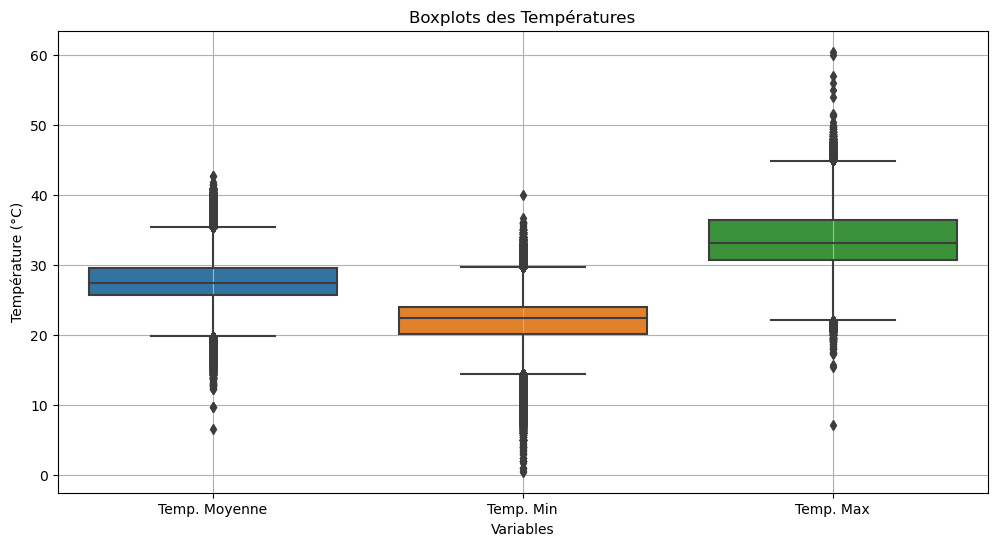

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assurez-vous que le DataFrame pays_CEDEAO est déjà chargé et prêt à être utilisé

# Affichage des boxplots pour temp_moyenne_c, temp_min_c et temp_max_c
plt.figure(figsize=(12, 6))
sns.boxplot(data=pays_CEDEAO[['temp_moyenne_c', 'temp_min_c', 'temp_max_c']])
plt.title('Boxplots des Températures')
plt.ylabel('Température (°C)')
plt.xlabel('Variables')
plt.xticks(ticks=[0, 1, 2], labels=['Temp. Moyenne', 'Temp. Min', 'Temp. Max'])  # Renommage des axes x
plt.grid(True)
plt.show()

<p class = "styled-text">Apparemment il y a des jours où il y a eu plus de 60°C. Est-ce normal?</p>

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

In [16]:
import polars as pl

# Liste des quantiles souhaités
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Calcul des déciles pour chaque variable de température
deciles_temp_moyenne = [pays_CEDEAO.select(pl.col('temp_moyenne_c').quantile(q)).to_series()[0] for q in quantiles]
deciles_temp_min = [pays_CEDEAO.select(pl.col('temp_min_c').quantile(q)).to_series()[0] for q in quantiles]
deciles_temp_max = [pays_CEDEAO.select(pl.col('temp_max_c').quantile(q)).to_series()[0] for q in quantiles]

# Créer un DataFrame avec les résultats
deciles_df = pl.DataFrame({
    "Décile": [f"Décile {int(q * 10)}" for q in quantiles],
    "temp_moyenne_c": deciles_temp_moyenne,
    "temp_min_c": deciles_temp_min,
    "temp_max_c": deciles_temp_max
})

# Afficher le tableau des déciles
print("Déciles des variables de température :")
print(deciles_df)


Déciles des variables de température :
shape: (9, 4)
┌──────────┬────────────────┬────────────┬────────────┐
│ Décile   ┆ temp_moyenne_c ┆ temp_min_c ┆ temp_max_c │
│ ---      ┆ ---            ┆ ---        ┆ ---        │
│ str      ┆ f64            ┆ f64        ┆ f64        │
╞══════════╪════════════════╪════════════╪════════════╡
│ Décile 1 ┆ 24.2           ┆ 17.5       ┆ 28.5       │
│ Décile 2 ┆ 25.3           ┆ 19.6       ┆ 30.0       │
│ Décile 3 ┆ 26.1           ┆ 20.9       ┆ 31.2       │
│ Décile 4 ┆ 26.8           ┆ 21.6       ┆ 32.2       │
│ Décile 5 ┆ 27.5           ┆ 22.4       ┆ 33.2       │
│ Décile 6 ┆ 28.2           ┆ 23.0       ┆ 34.4       │
│ Décile 7 ┆ 29.1           ┆ 23.8       ┆ 35.6       │
│ Décile 8 ┆ 30.2           ┆ 24.6       ┆ 37.2       │
│ Décile 9 ┆ 32.2           ┆ 26.0       ┆ 39.4       │
└──────────┴────────────────┴────────────┴────────────┘


**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

In [17]:

# Base de données pour les villes où la température maximale dépasse 50 °C
villes_temp_max_50 = (
    pays_CEDEAO
    .filter(pl.col("temp_max_c") > 50)
    .select(["nom_ville", "date"])
    .unique()
)
nb_villes_temp_max_50 = villes_temp_max_50["nom_ville"].n_unique()
print(f"Nombre de villes où la température maximale dépasse 50°C : {nb_villes_temp_max_50}")

# Base de données pour les villes où la température minimale est inférieure à 5 °C
villes_temp_min_5 = (
    pays_CEDEAO
    .filter(pl.col("temp_min_c") < 5)
    .select(["nom_ville", "date"])
    .unique()
)
nb_villes_temp_min_5 = villes_temp_min_5["nom_ville"].n_unique()
print(f"Nombre de villes où la température minimale est inférieure à 5°C : {nb_villes_temp_min_5}")


Nombre de villes où la température maximale dépasse 50°C : 7
Nombre de villes où la température minimale est inférieure à 5°C : 16


**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

In [18]:
# Détection des valeurs aberrantes basées sur des plages réalistes
outliers_realistes = pays_CEDEAO.filter(
    (pl.col("temp_moyenne_c") < 5) | (pl.col("temp_moyenne_c") > 50) |  # Température moyenne
    (pl.col("temp_min_c") < 5) | (pl.col("temp_min_c") > 40) |          # Température minimale
    (pl.col("temp_max_c") < 15) | (pl.col("temp_max_c") > 50)           # Température maximale
)

# Afficher le nombre d'observations avec des valeurs aberrantes
nombre_outliers = outliers_realistes.height
print(f"Nombre d'observations avec des valeurs aberrantes : {nombre_outliers}")

Nombre d'observations avec des valeurs aberrantes : 42


**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h3 class = "styled-sub-subtitle"><a id="cor_val_ab">3.1.7 Correction des valeurs aberrantes</a></h3>

Dans notre analyse des données météorologiques, nous avons défini des plages raisonnables pour les températures moyenne, minimale et maximale. Toute valeur en dehors de ces plages est considérée comme abérante. Ces plages de températures ont été établies à partir de recherches pour garantir leur exactitude par rapport aux conditions observables.

Pour corriger les valeurs abérantes, nous avons adopté la **méthode de la moyenne des plus proches voisins** : 

- Les valeurs abérantes sont remplacées par la moyenne des valeurs valides (non-abérantes) qui partagent les mêmes **saison**, **année**, **station météorologique**, et **pays**.
- Cela assure une cohérence temporelle et géographique dans la correction des valeurs.

In [19]:
import polars as pl

# Liste des colonnes à corriger
colonnes_a_corriger = ['temp_moyenne_c', 'temp_min_c', 'temp_max_c']

# Définir les plages réalistes pour les températures
plages_realistes = {
    'temp_moyenne_c': (5, 50),
    'temp_min_c': (5, 40),
    'temp_max_c': (15, 50)
}

# Créer une colonne 'annee' dans CEDEAO
pays_CEDEAO = pays_CEDEAO.with_columns(
    pl.col('date').dt.year().alias('annee')
)

for colonne in colonnes_a_corriger:
    # Définir les limites inférieures et supérieures de la plage réaliste pour chaque colonne
    limite_inferieure, limite_superieure = plages_realistes[colonne]
    
    # Calculer la moyenne pour chaque combinaison de pays, id_station, année et saison
    moyennes_df = (
        pays_CEDEAO
        .group_by(['pays', 'id_station', 'annee', 'saison'])
        .agg(pl.col(colonne).mean().alias(f'moyenne_{colonne}'))
    )

    # Effectuer une jointure pour remplacer les valeurs aberrantes
    pays_CEDEAO = (
        pays_CEDEAO
        .join(moyennes_df, on=['pays', 'id_station', 'annee', 'saison'], how='left')
        .with_columns(
            pl.when(
                (pl.col(colonne) < limite_inferieure) | (pl.col(colonne) > limite_superieure)
            )
            .then(pl.col(f'moyenne_{colonne}'))  # Remplacer par la moyenne
            .otherwise(pl.col(colonne))  # Garder la valeur d'origine
            .alias(colonne)  # Mettre à jour la colonne
        )
        .drop(f'moyenne_{colonne}')  # Supprimer la colonne de moyenne après utilisation
    )

# Afficher le DataFrame final corrigé
print(pays_CEDEAO)


shape: (1_185_080, 16)
┌────────────┬───────────┬───────┬────────┬───┬────────────┬──────────────────┬───────┬───────┐
│ id_station ┆ nom_ville ┆ pays  ┆ etat   ┆ … ┆ temp_max_c ┆ precipitation_mm ┆ index ┆ annee │
│ ---        ┆ ---       ┆ ---   ┆ ---    ┆   ┆ ---        ┆ ---              ┆ ---   ┆ ---   │
│ str        ┆ str       ┆ str   ┆ str    ┆   ┆ f64        ┆ f64              ┆ i64   ┆ i32   │
╞════════════╪═══════════╪═══════╪════════╪═══╪════════════╪══════════════════╪═══════╪═══════╡
│ 65338      ┆ Abomey    ┆ Benin ┆ Zou    ┆ … ┆ null       ┆ null             ┆ 0     ┆ 1973  │
│ 65338      ┆ Abomey    ┆ Benin ┆ Zou    ┆ … ┆ null       ┆ null             ┆ 1     ┆ 1973  │
│ 65338      ┆ Abomey    ┆ Benin ┆ Zou    ┆ … ┆ null       ┆ null             ┆ 2     ┆ 1973  │
│ 65338      ┆ Abomey    ┆ Benin ┆ Zou    ┆ … ┆ null       ┆ null             ┆ 3     ┆ 1973  │
│ 65338      ┆ Abomey    ┆ Benin ┆ Zou    ┆ … ┆ 35.0       ┆ null             ┆ 4     ┆ 1973  │
│ …          ┆ … 

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h3 class = "styled-sub-subtitle">
    <a id="v_trait">3.1.8 Vérification des traitements</a>
</h3>

In [20]:
# Détection des valeurs aberrantes basées sur des plages réalistes
outliers_realistes = pays_CEDEAO.filter(
    (pl.col("temp_moyenne_c") < 5) | (pl.col("temp_moyenne_c") > 50) |  # Température moyenne
    (pl.col("temp_min_c") < 5) | (pl.col("temp_min_c") > 40) |          # Température minimale
    (pl.col("temp_max_c") < 15) | (pl.col("temp_max_c") > 50)           # Température maximale
)

# Afficher le nombre d'observations avec des valeurs aberrantes
nombre_outliers = outliers_realistes.height
print(f"Nombre d'observations avec des valeurs aberrantes : {nombre_outliers}")

Nombre d'observations avec des valeurs aberrantes : 1


voir l'observation aberrante

In [21]:
# Afficher les observations contenant des valeurs aberrantes pour les colonnes spécifiques
colonnes_a_afficher = ["id_station", "nom_ville", "pays", "temp_moyenne_c", "temp_min_c", "temp_max_c","annee"]
observations_outliers = outliers_realistes.select(colonnes_a_afficher)

print("Observations avec des valeurs aberrantes :")
print(observations_outliers)


Observations avec des valeurs aberrantes :
shape: (1, 7)
┌────────────┬───────────┬────────┬────────────────┬────────────┬────────────┬───────┐
│ id_station ┆ nom_ville ┆ pays   ┆ temp_moyenne_c ┆ temp_min_c ┆ temp_max_c ┆ annee │
│ ---        ┆ ---       ┆ ---    ┆ ---            ┆ ---        ┆ ---        ┆ ---   │
│ str        ┆ str       ┆ str    ┆ f64            ┆ f64        ┆ f64        ┆ i32   │
╞════════════╪═══════════╪════════╪════════════════╪════════════╪════════════╪═══════╡
│ 61809      ┆ Labé      ┆ Guinea ┆ 20.1           ┆ 4.0        ┆ null       ┆ 2001  │
└────────────┴───────────┴────────┴────────────────┴────────────┴────────────┴───────┘


Après traitement , il y'a une seule observation qui est toujours abberante , du fait qu'elle à une temperature mininale de 4.0 dégré celcius , étant donnée que cette valeur est au voisinage de votre plage réaliste , et vu la taille de notre base de donnée , elle ne peut en aucun cas constitué un biais pour notre analyse 

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h2 class = "styled-subtitle"><a id="trait_v_mq">3.1.9 Traitement des valeurs manquantes</a></h2>

<h4><a id="exp_v_mq_pays">3.1.9.1 Vérifions si les valeurs manquantes sont expliquées par un ou des pays spécifiques</a></h4>

<p class = "styled-text">En résumé, ce code filtre le DataFrame de données sur les pays de l'Afrique de l'Ouest pour créer des DataFrames spécifiques à chaque pays. Ensuite, il compte les valeurs manquantes pour chaque colonne dans ces DataFrames et stocke ces informations dans un dictionnaire. L'affichage des résultats est prévu, mais actuellement commenté pour ne pas être exécuté.</p>

In [22]:

# Créer un dictionnaire pour stocker les DataFrames par pays
dataframes_par_pays = {}

# Filtrer les données pour chaque pays et les stocker dans le dictionnaire
for pays in pays_afrique_ouest:
    dataframes_par_pays[pays] = pays_CEDEAO.filter(pl.col('pays') == pays)

# Créer un dictionnaire pour stocker le pourcentage de valeurs manquantes par pays
pourcentages_manquants_par_pays = {}

# Compter les valeurs manquantes pour chaque DataFrame de pays
for pays, df in dataframes_par_pays.items():
    total_lignes = df.height  # Nombre total de lignes
    # Calculer le pourcentage de valeurs manquantes
    pourcentage_manquants = {
        "temp_moyenne_c": df["temp_moyenne_c"].is_null().sum() / total_lignes * 100,
        "temp_min_c": df["temp_min_c"].is_null().sum() / total_lignes * 100,
        "temp_max_c": df["temp_max_c"].is_null().sum() / total_lignes * 100,
    }
    # Ajouter le pays dans le dictionnaire
    pourcentages_manquants_par_pays[pays] = pourcentage_manquants

# Concaténer tous les DataFrames de pourcentages en un seul
tableau_concatene = pl.concat([
    pl.DataFrame({
        "pays": pays,
        **pourcentages_manquants_par_pays[pays]
    }) for pays in pourcentages_manquants_par_pays
])

# Afficher le tableau final
print("Tableau des pourcentages de valeurs manquantes par pays:")
print(tableau_concatene)


Tableau des pourcentages de valeurs manquantes par pays:
shape: (15, 4)
┌──────────────┬────────────────┬────────────┬────────────┐
│ pays         ┆ temp_moyenne_c ┆ temp_min_c ┆ temp_max_c │
│ ---          ┆ ---            ┆ ---        ┆ ---        │
│ str          ┆ f64            ┆ f64        ┆ f64        │
╞══════════════╪════════════════╪════════════╪════════════╡
│ Benin        ┆ 24.751041      ┆ 12.871175  ┆ 7.966685   │
│ Burkina Faso ┆ 15.491577      ┆ 12.576485  ┆ 7.177812   │
│ Cape Verde   ┆ 0.0            ┆ 16.416525  ┆ 18.118521  │
│ Ivory Coast  ┆ 19.967323      ┆ 15.938011  ┆ 11.753003  │
│ The Gambia   ┆ 0.0            ┆ 37.521041  ┆ 33.596021  │
│ …            ┆ …              ┆ …          ┆ …          │
│ Niger        ┆ 24.183007      ┆ 11.74693   ┆ 10.975059  │
│ Nigeria      ┆ 8.720055       ┆ 21.835413  ┆ 19.959985  │
│ Senegal      ┆ 0.000728       ┆ 22.321422  ┆ 12.599594  │
│ Sierra Leone ┆ 37.361852      ┆ 31.626986  ┆ 23.984165  │
│ Togo         ┆ 23.48396   

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

les valeurs manquantes pour les variables  temp_min_c , temp_max_c et temp_moyenne_c sont quasiment observé pour chaque pays  , avec un pourcentage inférieur à 40% .  ainsi lintérét de garder tout les pays de la CEDEAO pour notre analyse 

<h4><a id="v_mq_annees">3.1.9.2 Vérifions si les valeurs manquante sont expliqués par un ou des années spécifique</a></h4>

In [23]:
import polars as pl

# Créer un dictionnaire pour stocker le pourcentage de valeurs manquantes par année
pourcentages_manquants_par_annee = {}

# Extraire les années uniques du DataFrame
annees_uniques = pays_CEDEAO.select(pl.col('date').dt.year().alias('annee')).unique()

# Compter les valeurs manquantes pour chaque année
for row in annees_uniques.iter_rows():
    annee = row[0]
    # Filtrer le DataFrame pour l'année courante
    df_annee = pays_CEDEAO.filter(pl.col('date').dt.year() == annee)
    
    # Calculer le nombre total de lignes pour obtenir le pourcentage
    total_lignes = df_annee.height
    
    # Compter les pourcentages de valeurs manquantes pour les colonnes spécifiques
    pourcentage_manquants = {
        "temp_moyenne_c": (df_annee["temp_moyenne_c"].is_null().sum() / total_lignes * 100) if total_lignes > 0 else 0,
        "temp_min_c": (df_annee["temp_min_c"].is_null().sum() / total_lignes * 100) if total_lignes > 0 else 0,
        "temp_max_c": (df_annee["temp_max_c"].is_null().sum() / total_lignes * 100) if total_lignes > 0 else 0,
    }
    
    # Ajouter une colonne 'annee' pour identifier chaque année dans le dictionnaire
    pourcentage_manquants["annee"] = annee
    
    # Stocker le résultat dans le dictionnaire
    pourcentages_manquants_par_annee[annee] = pourcentage_manquants

# Créer un DataFrame à partir des pourcentages
tableau_final = pl.DataFrame(list(pourcentages_manquants_par_annee.values()))

# Réorganiser les colonnes pour que 'annee' soit en premier
tableau_final = tableau_final.select(["annee", "temp_moyenne_c", "temp_min_c", "temp_max_c"])

# Afficher le tableau final
print("Tableau des pourcentages de valeurs manquantes par année avec les colonnes sélectionnées:")
print(tableau_final.head(20))


Tableau des pourcentages de valeurs manquantes par année avec les colonnes sélectionnées:
shape: (20, 4)
┌───────┬────────────────┬────────────┬────────────┐
│ annee ┆ temp_moyenne_c ┆ temp_min_c ┆ temp_max_c │
│ ---   ┆ ---            ┆ ---        ┆ ---        │
│ i64   ┆ f64            ┆ f64        ┆ f64        │
╞═══════╪════════════════╪════════════╪════════════╡
│ 1977  ┆ 2.740926       ┆ 11.783479  ┆ 9.674593   │
│ 2004  ┆ 0.0            ┆ 26.848141  ┆ 15.035627  │
│ 1983  ┆ 0.0            ┆ 19.566364  ┆ 14.638148  │
│ 1915  ┆ 100.0          ┆ 1.694915   ┆ 3.050847   │
│ 1921  ┆ 100.0          ┆ 0.0        ┆ 0.0        │
│ …     ┆ …              ┆ …          ┆ …          │
│ 1927  ┆ 100.0          ┆ 17.260274  ┆ 0.0        │
│ 1995  ┆ 0.0            ┆ 32.485845  ┆ 13.343859  │
│ 1986  ┆ 0.0            ┆ 22.640545  ┆ 15.150483  │
│ 2019  ┆ 0.0            ┆ 20.313063  ┆ 24.94095   │
│ 2022  ┆ 0.0            ┆ 0.784914   ┆ 0.01663    │
└───────┴────────────────┴────────────┴────────

les valeurs manquantes pour les variables  temp_min_c , temp_max_c  sont quasiment observé pour chaque année  , avec un pourcentage inférieur à 40% . quant à la température qui présente des valeurs manquante pour l''ensemble des observations sur des années , nous pourrions retrouver ces valeurs , car la  temperature moyenne vaut la moyenne de  temperature minimale et temperature maximale. Ainsi notre analyse peut porter sur toutes les années dans notre base

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h4 class = "styled-sub-subtitle"><a id="v_mq_saison">3.1.9.3 Vérifions si les valeurs manquantes sont expliquées par un ou des saisons spécifiques</a></h4>

In [24]:
import polars as pl

# Créer un dictionnaire pour stocker les moyennes par saison
moyennes_par_saison = {}

# Extraire les modalités uniques de la colonne 'saison'
modalites_saison = pays_CEDEAO.select('saison').unique()

# Calculer les moyennes pour chaque saison
for row in modalites_saison.iter_rows():
    saison = row[0]
    # Filtrer le DataFrame pour la saison courante
    df_saison = pays_CEDEAO.filter(pl.col('saison') == saison)
    
    # Calculer les moyennes pour les colonnes spécifiques (sans precipitation_mm)
    moyennes = df_saison.select([
        pl.col(c).mean().alias(c) for c in df_saison.columns if c in ["temp_moyenne_c", "temp_min_c", "temp_max_c"]
    ])
    
    # Ajouter une colonne 'saison' pour identifier chaque saison
    moyennes = moyennes.with_columns([pl.lit(saison).alias("saison")])
    
    # Stocker le résultat dans le dictionnaire
    moyennes_par_saison[saison] = moyennes

# Concaténer tous les DataFrames de moyennes par saison en un seul
tableau_final = pl.concat(list(moyennes_par_saison.values()))

# Réorganiser les colonnes pour que 'saison' soit en premier
colonnes_souhaitees = ["saison", "temp_moyenne_c", "temp_min_c", "temp_max_c"]
tableau_final = tableau_final.select([col for col in colonnes_souhaitees if col in tableau_final.columns])

# Afficher le tableau final
print("Tableau des moyennes par saison avec les colonnes sélectionnées:")
print(tableau_final)


Tableau des moyennes par saison avec les colonnes sélectionnées:
shape: (4, 4)
┌────────┬────────────────┬────────────┬────────────┐
│ saison ┆ temp_moyenne_c ┆ temp_min_c ┆ temp_max_c │
│ ---    ┆ ---            ┆ ---        ┆ ---        │
│ str    ┆ f64            ┆ f64        ┆ f64        │
╞════════╪════════════════╪════════════╪════════════╡
│ Autumn ┆ 27.51619       ┆ 21.941384  ┆ 33.166015  │
│ Winter ┆ 26.30484       ┆ 19.225195  ┆ 33.358668  │
│ Spring ┆ 29.98668       ┆ 23.801818  ┆ 36.207321  │
│ Summer ┆ 27.339911      ┆ 23.04249   ┆ 31.721018  │
└────────┴────────────────┴────────────┴────────────┘


pour toutes les saisons   , nous observons des valeurs manquantes , en deça de 40% pour chaque varibale dans une saison , ainsi notre analyse portera sur toutes les saisons 

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h4><a id="cor_v_mq">3.1.9.4 Corrections des valeurs manquantes</a></h3>

Nous commençons par corriger les valeurs manquantes des variables temp_min_c et temp_max_c en appliquant la méthode des k plus proches voisins (k-NN). Puisque nous travaillons sur des séries temporelles, il est essentiel de considérer les variations saisonnières des températures. Nous remplaçons ainsi les valeurs manquantes par la moyenne des observations non manquantes correspondant à la même saison, année, station météorologique et pays. Une fois ces valeurs corrigées, la mise à jour de la variable temp_moyenne_c devient plus simple, car nous savons qu'elle est calculée en utilisant la relation : temp_moyenne_c = (temp_min_c + temp_max_c) / 2.

In [25]:
import polars as pl

# Liste des colonnes à corriger
colonnes_a_corriger = ['temp_min_c', 'temp_max_c']

# Créer une colonne 'annee' dans CEDEAO
pays_CEDEAO = pays_CEDEAO.with_columns(pl.col('date').dt.year().alias('annee'))

for colonne in colonnes_a_corriger:
    # Calculer la moyenne pour chaque combinaison de pays, id_station, année et saison
    moyennes_df = (
        pays_CEDEAO
        .group_by(['pays', 'id_station', 'annee', 'saison'])
        .agg(pl.col(colonne).mean().alias(f'moyenne_{colonne}'))
    )

    # Effectuer une jointure pour remplir les valeurs manquantes
    pays_CEDEAO = (
        pays_CEDEAO
        .join(moyennes_df, on=['pays', 'id_station', 'annee', 'saison'], how='left')
        .with_columns(
            pl.when(pl.col(colonne).is_null())
            .then(pl.col(f'moyenne_{colonne}'))
            .otherwise(pl.col(colonne))
            .alias(colonne)
        )
        .drop(f'moyenne_{colonne}')  # Supprimer la colonne de moyenne après utilisation
    )

# Afficher le DataFrame final
print(pays_CEDEAO)


shape: (1_185_080, 16)
┌────────────┬───────────┬───────┬────────┬───┬────────────┬──────────────────┬───────┬───────┐
│ id_station ┆ nom_ville ┆ pays  ┆ etat   ┆ … ┆ temp_max_c ┆ precipitation_mm ┆ index ┆ annee │
│ ---        ┆ ---       ┆ ---   ┆ ---    ┆   ┆ ---        ┆ ---              ┆ ---   ┆ ---   │
│ str        ┆ str       ┆ str   ┆ str    ┆   ┆ f64        ┆ f64              ┆ i64   ┆ i32   │
╞════════════╪═══════════╪═══════╪════════╪═══╪════════════╪══════════════════╪═══════╪═══════╡
│ 65338      ┆ Abomey    ┆ Benin ┆ Zou    ┆ … ┆ 35.527778  ┆ null             ┆ 0     ┆ 1973  │
│ 65338      ┆ Abomey    ┆ Benin ┆ Zou    ┆ … ┆ 35.527778  ┆ null             ┆ 1     ┆ 1973  │
│ 65338      ┆ Abomey    ┆ Benin ┆ Zou    ┆ … ┆ 35.527778  ┆ null             ┆ 2     ┆ 1973  │
│ 65338      ┆ Abomey    ┆ Benin ┆ Zou    ┆ … ┆ 35.527778  ┆ null             ┆ 3     ┆ 1973  │
│ 65338      ┆ Abomey    ┆ Benin ┆ Zou    ┆ … ┆ 35.0       ┆ null             ┆ 4     ┆ 1973  │
│ …          ┆ … 

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h4><a id="ver_cor">3.1.9.5Vérifions la présence des valeurs manquantes après correction</a></h4>


* Première phase de correction

In [26]:
import polars as pl

# Vérifier les valeurs manquantes dans le DataFrame CEDEAO
valeurs_manquantes_pays_CEDEAO = pays_CEDEAO.select(
    *[pl.col(col).is_null().sum().alias(col) for col in pays_CEDEAO.columns]
)

# Extraire les résultats en tant que liste
valeurs_manquantes_list = valeurs_manquantes_pays_CEDEAO.row(0)  # Prendre la première ligne

# Afficher le nombre de valeurs manquantes par colonne
for column, missing in zip(pays_CEDEAO.columns, valeurs_manquantes_list):
    print(f"{column}: {missing} valeurs manquantes")


id_station: 0 valeurs manquantes
nom_ville: 0 valeurs manquantes
pays: 0 valeurs manquantes
etat: 6463 valeurs manquantes
iso2: 0 valeurs manquantes
iso3: 0 valeurs manquantes
latitude: 0 valeurs manquantes
longitude: 0 valeurs manquantes
date: 0 valeurs manquantes
saison: 0 valeurs manquantes
temp_moyenne_c: 188017 valeurs manquantes
temp_min_c: 21715 valeurs manquantes
temp_max_c: 13854 valeurs manquantes
precipitation_mm: 599391 valeurs manquantes
index: 0 valeurs manquantes
annee: 0 valeurs manquantes


Pour compléter ces valeurs, nous allons adopter une approche de moyenne en relâchant la contrainte de l'année. Autrement dit, nous calculerons la moyenne des valeurs non manquantes pour les groupes d’observations partageant le même pays, la même station, et la même saison, sans tenir compte de l’année. Cette moyenne sera ensuite attribuée aux observations manquantes dans ces groupes.

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

* Seconde phase de correction de valeurs manquantes

In [27]:

# Liste des colonnes à corriger (limitées à temp_min_c et temp_max_c)
colonnes_a_corriger = ['temp_min_c', 'temp_max_c']

for colonne in colonnes_a_corriger:
    # Calculer la moyenne pour chaque combinaison de pays, id_station et saison
    moyennes_df = (
        pays_CEDEAO
        .group_by(['pays', 'id_station', 'saison'])
        .agg(pl.col(colonne).mean().alias(f'moyenne_{colonne}'))
    )

    # Effectuer une jointure pour remplir les valeurs manquantes
    pays_CEDEAO = (
        pays_CEDEAO
        .join(moyennes_df, on=['pays', 'id_station', 'saison'], how='left')
        .with_columns(
            pl.when(pl.col(colonne).is_null())
            .then(pl.col(f'moyenne_{colonne}'))
            .otherwise(pl.col(colonne))
            .alias(colonne)
        )
        .drop(f'moyenne_{colonne}')  # Supprimer la colonne de moyenne après utilisation
    )

# Afficher le DataFrame final
print("Tableau final avec valeurs manquantes corrigées pour temp_min_c et temp_max_c :")
print(pays_CEDEAO)


Tableau final avec valeurs manquantes corrigées pour temp_min_c et temp_max_c :
shape: (1_185_080, 16)
┌────────────┬───────────┬───────┬────────┬───┬────────────┬──────────────────┬───────┬───────┐
│ id_station ┆ nom_ville ┆ pays  ┆ etat   ┆ … ┆ temp_max_c ┆ precipitation_mm ┆ index ┆ annee │
│ ---        ┆ ---       ┆ ---   ┆ ---    ┆   ┆ ---        ┆ ---              ┆ ---   ┆ ---   │
│ str        ┆ str       ┆ str   ┆ str    ┆   ┆ f64        ┆ f64              ┆ i64   ┆ i32   │
╞════════════╪═══════════╪═══════╪════════╪═══╪════════════╪══════════════════╪═══════╪═══════╡
│ 65338      ┆ Abomey    ┆ Benin ┆ Zou    ┆ … ┆ 35.527778  ┆ null             ┆ 0     ┆ 1973  │
│ 65338      ┆ Abomey    ┆ Benin ┆ Zou    ┆ … ┆ 35.527778  ┆ null             ┆ 1     ┆ 1973  │
│ 65338      ┆ Abomey    ┆ Benin ┆ Zou    ┆ … ┆ 35.527778  ┆ null             ┆ 2     ┆ 1973  │
│ 65338      ┆ Abomey    ┆ Benin ┆ Zou    ┆ … ┆ 35.527778  ┆ null             ┆ 3     ┆ 1973  │
│ 65338      ┆ Abomey    ┆ Benin 

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

* Vérifions à nouveau la présence de valeurs manquante

In [28]:
import polars as pl

# Vérifier les valeurs manquantes dans le DataFrame CEDEAO
valeurs_manquantes_pays_CEDEAO = pays_CEDEAO.select(
    *[pl.col(col).is_null().sum().alias(col) for col in pays_CEDEAO.columns]
)

# Extraire les résultats en tant que liste
valeurs_manquantes_list = valeurs_manquantes_pays_CEDEAO.row(0)  # Prendre la première ligne

# Afficher le nombre de valeurs manquantes par colonne
for column, missing in zip(pays_CEDEAO.columns, valeurs_manquantes_list):
    print(f"{column}: {missing} valeurs manquantes")


id_station: 0 valeurs manquantes
nom_ville: 0 valeurs manquantes
pays: 0 valeurs manquantes
etat: 6463 valeurs manquantes
iso2: 0 valeurs manquantes
iso3: 0 valeurs manquantes
latitude: 0 valeurs manquantes
longitude: 0 valeurs manquantes
date: 0 valeurs manquantes
saison: 0 valeurs manquantes
temp_moyenne_c: 188017 valeurs manquantes
temp_min_c: 0 valeurs manquantes
temp_max_c: 0 valeurs manquantes
precipitation_mm: 599391 valeurs manquantes
index: 0 valeurs manquantes
annee: 0 valeurs manquantes


Ainsi après avoir corriger toutes les valeurs manquante pour les variables temp_min_c et temp_max_c , nous pouvons avoir les valeurs de la variable temp_moyenne_c

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

In [29]:
# Remplacer les valeurs manquantes dans temp_moyenne_c
pays_CEDEAO = pays_CEDEAO.with_columns(
    pl.when(pl.col('temp_moyenne_c').is_null() & pl.col('temp_min_c').is_not_null() & pl.col('temp_max_c').is_not_null())
    .then((pl.col('temp_min_c') + pl.col('temp_max_c')) / 2)
    .otherwise(pl.col('temp_moyenne_c')).alias('temp_moyenne_c')
)
# Vérifier les valeurs manquantes dans le DataFrame CEDEAO
valeurs_manquantes_pays_CEDEAO = pays_CEDEAO.select(
    *[pl.col(col).is_null().sum().alias(col) for col in pays_CEDEAO.columns]
)

# Extraire les résultats en tant que liste
valeurs_manquantes_list = valeurs_manquantes_pays_CEDEAO.row(0)  # Prendre la première ligne

# Afficher le nombre de valeurs manquantes par colonne
for column, missing in zip(pays_CEDEAO.columns, valeurs_manquantes_list):
    print(f"{column}: {missing} valeurs manquantes")

id_station: 0 valeurs manquantes
nom_ville: 0 valeurs manquantes
pays: 0 valeurs manquantes
etat: 6463 valeurs manquantes
iso2: 0 valeurs manquantes
iso3: 0 valeurs manquantes
latitude: 0 valeurs manquantes
longitude: 0 valeurs manquantes
date: 0 valeurs manquantes
saison: 0 valeurs manquantes
temp_moyenne_c: 0 valeurs manquantes
temp_min_c: 0 valeurs manquantes
temp_max_c: 0 valeurs manquantes
precipitation_mm: 599391 valeurs manquantes
index: 0 valeurs manquantes
annee: 0 valeurs manquantes


**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h2 class = "styled-subtitle">
    <a id="t_var_prep">3.2 Traitement de la variable précipitation</a>
</h2>

In [30]:
df_cedeao = pays_CEDEAO
# Filtrer les lignes où 'precipitation_mm' est manquant
val_mq_precipitations = df_cedeao.filter(pl.col('precipitation_mm').is_null())

# Afficher le DataFrame contenant les valeurs manquantes
print(val_mq_precipitations)

shape: (599_391, 16)
┌────────────┬───────────┬───────┬────────┬───┬────────────┬──────────────────┬───────┬───────┐
│ id_station ┆ nom_ville ┆ pays  ┆ etat   ┆ … ┆ temp_max_c ┆ precipitation_mm ┆ index ┆ annee │
│ ---        ┆ ---       ┆ ---   ┆ ---    ┆   ┆ ---        ┆ ---              ┆ ---   ┆ ---   │
│ str        ┆ str       ┆ str   ┆ str    ┆   ┆ f64        ┆ f64              ┆ i64   ┆ i32   │
╞════════════╪═══════════╪═══════╪════════╪═══╪════════════╪══════════════════╪═══════╪═══════╡
│ 65338      ┆ Abomey    ┆ Benin ┆ Zou    ┆ … ┆ 35.527778  ┆ null             ┆ 0     ┆ 1973  │
│ 65338      ┆ Abomey    ┆ Benin ┆ Zou    ┆ … ┆ 35.527778  ┆ null             ┆ 1     ┆ 1973  │
│ 65338      ┆ Abomey    ┆ Benin ┆ Zou    ┆ … ┆ 35.527778  ┆ null             ┆ 2     ┆ 1973  │
│ 65338      ┆ Abomey    ┆ Benin ┆ Zou    ┆ … ┆ 35.527778  ┆ null             ┆ 3     ┆ 1973  │
│ 65338      ┆ Abomey    ┆ Benin ┆ Zou    ┆ … ┆ 35.0       ┆ null             ┆ 4     ┆ 1973  │
│ …          ┆ …   

<p class = "styled-text">L'objectif est de récupérer les dates pour vérifier notre intuition: il ne pleut
presque pas en janvier dans les pays de la zone CEDEAO.</p>

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

In [31]:
valeurs_manquantes = df_cedeao.select([pl.col(col).is_null().sum().alias(col) for col in df_cedeao.columns])


In [32]:
# Récupérer les dates uniques où il manque des données
dates_mq = val_mq_precipitations.select(pl.col('date')).unique()
# Afficher les dates
print(dates_mq)
# QU'est-ce que je disais?

shape: (31_168, 1)
┌─────────────────────┐
│ date                │
│ ---                 │
│ datetime[ns]        │
╞═════════════════════╡
│ 1966-04-24 00:00:00 │
│ 1991-08-16 00:00:00 │
│ 1982-08-08 00:00:00 │
│ 1939-06-30 00:00:00 │
│ 1997-03-03 00:00:00 │
│ …                   │
│ 2001-02-10 00:00:00 │
│ 2008-12-03 00:00:00 │
│ 1944-05-25 00:00:00 │
│ 1923-09-21 00:00:00 │
│ 2013-07-26 00:00:00 │
└─────────────────────┘


In [33]:
# Ajouter une colonne 'month' à partir de la colonne 'date'
val_mq_precipitations = val_mq_precipitations.with_columns(
    pl.col('date').dt.month().alias('month')
)

In [34]:
mois_uniques = val_mq_precipitations['month'].unique()

# Afficher les mois uniques
#print(mois_uniques)

In [35]:
# Calculer la distribution des fréquences de la colonne 'month'
distribution_frequences = val_mq_precipitations['month'].value_counts()

# Afficher la distribution des fréquences
print(distribution_frequences)

shape: (12, 2)
┌───────┬───────┐
│ month ┆ count │
│ ---   ┆ ---   │
│ i8    ┆ u32   │
╞═══════╪═══════╡
│ 8     ┆ 35322 │
│ 12    ┆ 61539 │
│ 10    ┆ 46852 │
│ 9     ┆ 34526 │
│ 3     ┆ 59897 │
│ …     ┆ …     │
│ 2     ┆ 57376 │
│ 1     ┆ 63620 │
│ 4     ┆ 54263 │
│ 5     ┆ 50619 │
│ 7     ┆ 38570 │
└───────┴───────┘


In [36]:
val_mq_precipitations['nom_ville'].unique() #

nom_ville
str
"""Kano"""
"""Accra"""
"""Birnin Kebbi"""
"""Kankan"""
"""Tahoua"""
…
"""Labé"""
"""Aboisso"""
"""Ilorin"""


<h3 class="styled sub-subtitle">
<a id="villes_pluies">3.2.1 Villes pour les quelles il n'y pas de données sur les précipitations</a></h3>

In [37]:
val_mq_precipitations.head()

id_station,nom_ville,pays,etat,iso2,iso3,latitude,longitude,date,saison,temp_moyenne_c,temp_min_c,temp_max_c,precipitation_mm,index,annee,month
str,str,str,str,str,str,f64,f64,datetime[ns],cat,f64,f64,f64,f64,i64,i32,i8
"""65338""","""Abomey""","""Benin""","""Zou""","""BJ""","""BEN""",7.1904,1.989997,1973-01-02 00:00:00,"""Winter""",29.0,24.090909,35.527778,null,0,1973,1
"""65338""","""Abomey""","""Benin""","""Zou""","""BJ""","""BEN""",7.1904,1.989997,1973-01-03 00:00:00,"""Winter""",30.2,24.090909,35.527778,null,1,1973,1
"""65338""","""Abomey""","""Benin""","""Zou""","""BJ""","""BEN""",7.1904,1.989997,1973-01-04 00:00:00,"""Winter""",30.4,24.090909,35.527778,null,2,1973,1
"""65338""","""Abomey""","""Benin""","""Zou""","""BJ""","""BEN""",7.1904,1.989997,1973-01-06 00:00:00,"""Winter""",29.4,26.0,35.527778,null,3,1973,1
"""65338""","""Abomey""","""Benin""","""Zou""","""BJ""","""BEN""",7.1904,1.989997,1973-01-07 00:00:00,"""Winter""",29.3,24.0,35.0,null,4,1973,1


In [142]:
df_cedeao.head()

id_station,nom_ville,pays,etat,iso2,iso3,latitude,longitude,date,saison,temp_moyenne_c,temp_min_c,temp_max_c,precipitation_mm,index,annee
str,str,str,str,str,str,f64,f64,datetime[ns],cat,f64,f64,f64,f64,i64,i32
"""65338""","""Abomey""","""Benin""","""Zou""","""BJ""","""BEN""",7.1904,1.989997,1973-01-02 00:00:00,"""Winter""",29.0,24.090909,35.527778,null,0,1973
"""65338""","""Abomey""","""Benin""","""Zou""","""BJ""","""BEN""",7.1904,1.989997,1973-01-03 00:00:00,"""Winter""",30.2,24.090909,35.527778,null,1,1973
"""65338""","""Abomey""","""Benin""","""Zou""","""BJ""","""BEN""",7.1904,1.989997,1973-01-04 00:00:00,"""Winter""",30.4,24.090909,35.527778,null,2,1973
"""65338""","""Abomey""","""Benin""","""Zou""","""BJ""","""BEN""",7.1904,1.989997,1973-01-06 00:00:00,"""Winter""",29.4,26.0,35.527778,null,3,1973
"""65338""","""Abomey""","""Benin""","""Zou""","""BJ""","""BEN""",7.1904,1.989997,1973-01-07 00:00:00,"""Winter""",29.3,24.0,35.0,null,4,1973


In [38]:
# Créer le tableau croisé dynamique avec city_name en lignes et month en colonnes
tableau_croise = pd.crosstab(val_mq_precipitations['nom_ville'], val_mq_precipitations['month'])

# Afficher le tableau croisé
print(tableau_croise)


col_0           1     2     3     4     5     6     7     8     9     10  \
row_0                                                                      
Abidjan       1115   937   865   746   578   416   692   812   709   593   
Aboisso        926   744   700   605   440   319   563   598   440   383   
Abomey        1125   990   886   718   702   591   639   639   498   603   
Accra         1002   850   946   836   800   616   793   771   692   685   
Agadez        1381  1237  1383  1317  1356  1141   987   843  1112  1339   
...            ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
Wa             322   296   289   271   264   243   238   223   237   232   
Yamoussoukro   903   762   695   622   579   504   655   579   462   512   
Yola            44    36    37    52    49    49    38    33    19    37   
Ziguinchor    1137  1083  1183  1151  1139   792   427   267   317   660   
Zinder        1820  1645  1798  1755  1692  1428  1219  1105  1451  1874   

col_0      

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

In [39]:
fichier_excel = 'tableau_croise_villes_mois.xlsx'
tableau_croise.to_excel(fichier_excel)

<p class = "styledd-text">Le tableau croisé ne nous permet pas de dire avec certitude que les données manquantes ne sont pas dues   
à l'absence de pluies. Il y a des villes comme AGADEZ où il ne pleut presque jamais. Aussi, comme la probabilité de pluies en janvier et février est moindre par rapport à celle de pluies en mai, juin ..., cela se confirme dans les données parce que les valeurs manquantes sont plus nombreuses dans les mois de janvier et février, voire même en décembre que les autres moi. Alors, jusqu'à preuve de contraire, nous considérons ces données manquantes comme des inobservations de précipitations. Tout ce que nous pouvons faire est d'imputer par zéro les valeurs manquantes</p>

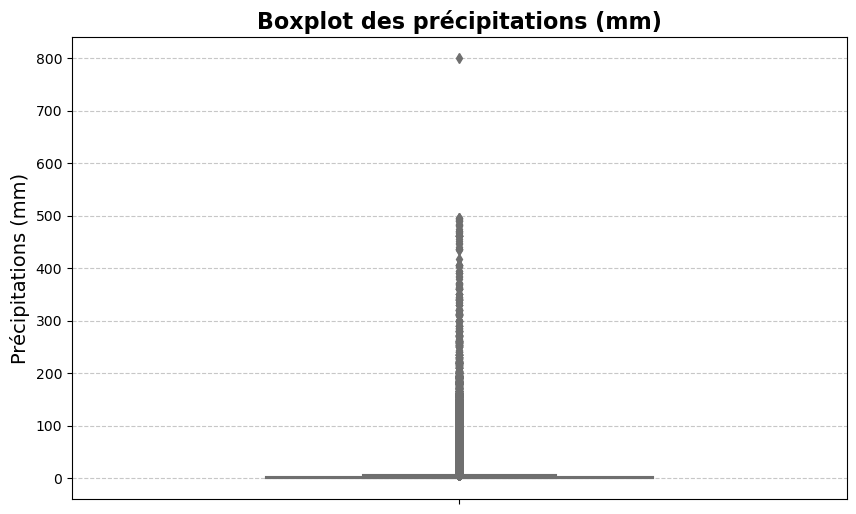

In [40]:
df_moustache = pays_CEDEAO.filter(pl.col("precipitation_mm").is_not_null())

# Convertir en pandas pour une compatibilité avec seaborn
df_moustache_pd = df_moustache.to_pandas()

# Configuration de la taille de la figure
plt.figure(figsize=(10, 6))

# Créer le boxplot
sns.boxplot(y='precipitation_mm', data=df_moustache_pd, color='skyblue', fliersize=5, width=0.5)

# Ajouter un titre et des labels
plt.title('Boxplot des précipitations (mm)', fontsize=16, fontweight='bold')
plt.ylabel('Précipitations (mm)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajouter une grille

# Afficher le boxplot
plt.show()

Il y a une valeur atypique (800 mm)

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

In [41]:
# Filtrer le DataFrame pour trouver les lignes avec une précipitation de 800 mm
ligne_precipitation_800mm = df_cedeao.filter(pl.col('precipitation_mm') == 800)

# Afficher la ou les lignes correspondantes
print(ligne_precipitation_800mm)

shape: (1, 16)
┌────────────┬───────────┬───────┬───────┬───┬────────────┬──────────────────┬───────┬───────┐
│ id_station ┆ nom_ville ┆ pays  ┆ etat  ┆ … ┆ temp_max_c ┆ precipitation_mm ┆ index ┆ annee │
│ ---        ┆ ---       ┆ ---   ┆ ---   ┆   ┆ ---        ┆ ---              ┆ ---   ┆ ---   │
│ str        ┆ str       ┆ str   ┆ str   ┆   ┆ f64        ┆ f64              ┆ i64   ┆ i32   │
╞════════════╪═══════════╪═══════╪═══════╪═══╪════════════╪══════════════════╪═══════╪═══════╡
│ 65344      ┆ Cotonou   ┆ Benin ┆ Ouémé ┆ … ┆ 33.3       ┆ 800.0            ┆ 1071  ┆ 1944  │
└────────────┴───────────┴───────┴───────┴───┴────────────┴──────────────────┴───────┴───────┘


C'était le 2 février 1944, et en plus en hivers. Nous allons la laisser telle quelle car nous ne comptons pas travailler avec cette donnée.

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h2 class=""><a id="exportation">3.3 Exportation des données pour l'analyse et prévision</a></h2>

Nous pouvons supprimer les variables année état , car elle n'apporte pas d'informations pertinentes pour le besoin de notre analyse. Nous pouvons également supprimer la variable année ( créer pour faciliter des opérations effectuer précedemment ) , car la variable date donne des informations plus précise. 

In [53]:
pays_CEDEAO = pays_CEDEAO.drop(['etat', 'annee'])

ColumnNotFoundError: "etat" not found

Resolved plan until failure:

	---> FAILED HERE RESOLVING THIS_NODE <---
DF ["id_station", "nom_ville", "pays", "iso2"]; PROJECT */15 COLUMNS; SELECTION: None

In [54]:
from datetime import timedelta

# Trouver la dernière date
derniere_date = pays_CEDEAO.select(pl.col("date").max()).item()

# Calculer la date d'il y a 10 ans
date_10_ans = derniere_date - timedelta(days=10 * 365)

# Filtrer les données pour la période des 10 dernières années
pays_CEDEAO_10 = pays_CEDEAO.filter(
    (pl.col("date") >= date_10_ans) & 
    (pl.col("date") <= derniere_date)
)

# Afficher les premières lignes et le nombre d'observations
print(pays_CEDEAO_10.head())
print("Le nombre d'observations de la base des pays de la CEDEAO pour les dernières années est:", pays_CEDEAO_10.height)


shape: (5, 15)
┌────────────┬───────────┬───────┬──────┬───┬────────────┬──────────────────┬───────┬────────────────────┐
│ id_station ┆ nom_ville ┆ pays  ┆ iso2 ┆ … ┆ temp_max_c ┆ precipitation_mm ┆ index ┆ precipitation_null │
│ ---        ┆ ---       ┆ ---   ┆ ---  ┆   ┆ ---        ┆ ---              ┆ ---   ┆ ---                │
│ str        ┆ str       ┆ str   ┆ str  ┆   ┆ f64        ┆ f64              ┆ i64   ┆ f64                │
╞════════════╪═══════════╪═══════╪══════╪═══╪════════════╪══════════════════╪═══════╪════════════════════╡
│ 65338      ┆ Abomey    ┆ Benin ┆ BJ   ┆ … ┆ 31.4       ┆ null             ┆ 12875 ┆ 0.0                │
│ 65338      ┆ Abomey    ┆ Benin ┆ BJ   ┆ … ┆ 28.4       ┆ null             ┆ 12876 ┆ 0.0                │
│ 65338      ┆ Abomey    ┆ Benin ┆ BJ   ┆ … ┆ 31.5       ┆ 20.1             ┆ 12877 ┆ 20.1               │
│ 65338      ┆ Abomey    ┆ Benin ┆ BJ   ┆ … ┆ 31.6       ┆ 0.8              ┆ 12878 ┆ 0.8                │
│ 65338      ┆ Abomey 

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

In [55]:
from datetime import timedelta

# Trouver la dernière date
derniere_date = pays_CEDEAO.select(pl.col("date").max()).item()

# Calculer la date d'il y a 30 ans
date_30_ans = derniere_date - timedelta(days=30 * 365)

# Filtrer les données pour la période des 30 dernières années
pays_CEDEAO_30 = pays_CEDEAO.filter(
    (pl.col("date") >= date_30_ans) & 
    (pl.col("date") <= derniere_date)
)

# Afficher les premières lignes et le nombre d'observations
print(pays_CEDEAO_30.head())
print("Le nombre d'observations de la base des pays de la CEDEAO pour les 30 dernières années est:", pays_CEDEAO_30.height)


shape: (5, 15)
┌────────────┬───────────┬───────┬──────┬───┬────────────┬──────────────────┬───────┬────────────────────┐
│ id_station ┆ nom_ville ┆ pays  ┆ iso2 ┆ … ┆ temp_max_c ┆ precipitation_mm ┆ index ┆ precipitation_null │
│ ---        ┆ ---       ┆ ---   ┆ ---  ┆   ┆ ---        ┆ ---              ┆ ---   ┆ ---                │
│ str        ┆ str       ┆ str   ┆ str  ┆   ┆ f64        ┆ f64              ┆ i64   ┆ f64                │
╞════════════╪═══════════╪═══════╪══════╪═══╪════════════╪══════════════════╪═══════╪════════════════════╡
│ 65338      ┆ Abomey    ┆ Benin ┆ BJ   ┆ … ┆ 30.7       ┆ 17.0             ┆ 6800  ┆ 17.0               │
│ 65338      ┆ Abomey    ┆ Benin ┆ BJ   ┆ … ┆ 31.5       ┆ 0.0              ┆ 6801  ┆ 0.0                │
│ 65338      ┆ Abomey    ┆ Benin ┆ BJ   ┆ … ┆ 32.765714  ┆ 5.1              ┆ 6802  ┆ 5.1                │
│ 65338      ┆ Abomey    ┆ Benin ┆ BJ   ┆ … ┆ 30.7       ┆ null             ┆ 6803  ┆ 0.0                │
│ 65338      ┆ Abomey 

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h3 class = "styled-sub-subtitle">
    <a id="ex_csv">3.3.1 Exportation des bases de la CEDEAO sous format csv</a>
</h3>

In [57]:
pays_CEDEAO_30.write_csv('pays_CEDEAO_30ans.csv') # Données de la CEDEAO pour les trente dernières années
pays_CEDEAO_10.write_csv('pays_CEDEAO_10ans.csv') # Données de la CEDEAO pour les dix dernières années

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h1 class = "styled-title">ANALYSE</h1>

Les précipitations et les températures sont des indicateurs essentiels pour comprendre les dynamiques climatiques et leurs impacts sur l'environnement . L'analyse de ces variables nous permettra de mieux anticiper les changements saisonniers, de détecter des tendances à long terme et d'identifier d'éventuelles anomalies climatiques. Dans ce cadre , l'étude des températures et des précipitations mensuelles et annuelles fournit des informations précieuses sur les variations climatiques au fil des années et aide à modéliser des prévisions météorologiques.

<h2 class="styled-subtitle"><a id="anal_temp_my">4.1 Analyse de la température moyenne par pays</a></h2>


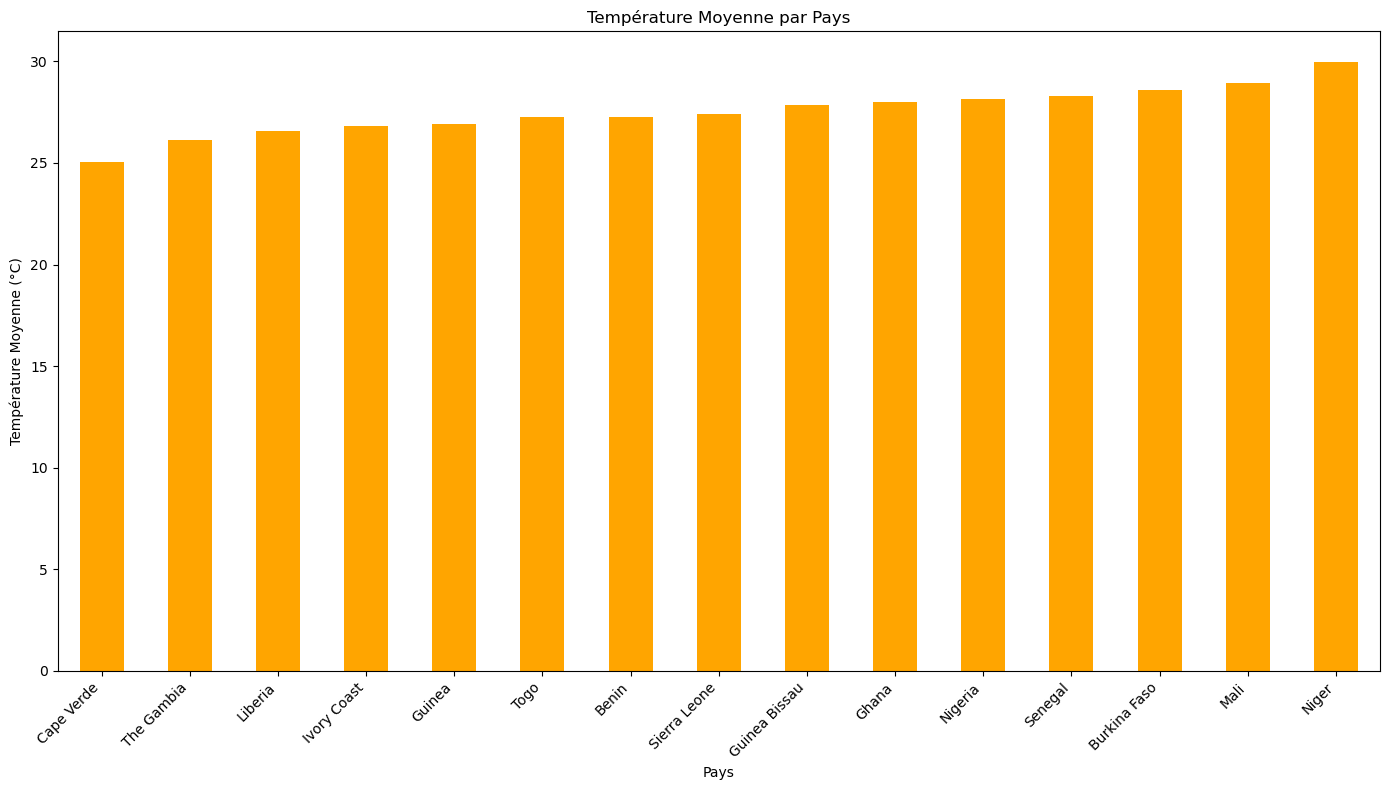

In [58]:
# Analyse de la température moyenne par pays
df_10 = pays_CEDEAO_10.to_pandas()
import matplotlib.pyplot as plt

# Calcul de la température moyenne par pays
temp_moyenne_pays = df_10.groupby('pays')['temp_moyenne_c'].mean()

# graphique des températures moyennes par pays
plt.figure(figsize=(14, 8))
temp_moyenne_pays.sort_values().plot(kind='bar', color='orange')
plt.title("Température Moyenne par Pays")
plt.xlabel("Pays")
plt.ylabel("Température Moyenne (°C)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Affichage
plt.show()

Le graphique présenté ci-dessus montre les variations de la température moyenne dans les pays de la zone CEDEAO sur une période de dix ans. Les données indiquent que les températures fluctuent généralement entre 25 °C et 30 °C au cours de cette période. En examinant les résultats de manière plus détaillée, il apparaît que le Cap-Vert se distingue en enregistrant les températures les plus basses de la région ,contrairement, au Niger qui se positionne à l'autre extrémité du spectre, avec des températures plus élevées. Ces différences de température soulignent  les variations climatiques au sein de la zone CEDEAO.

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h2 class="styled-subtitle"><a id="anal_temp_my_period">4.2 Analyse de la température annuelle par période</a></h2>


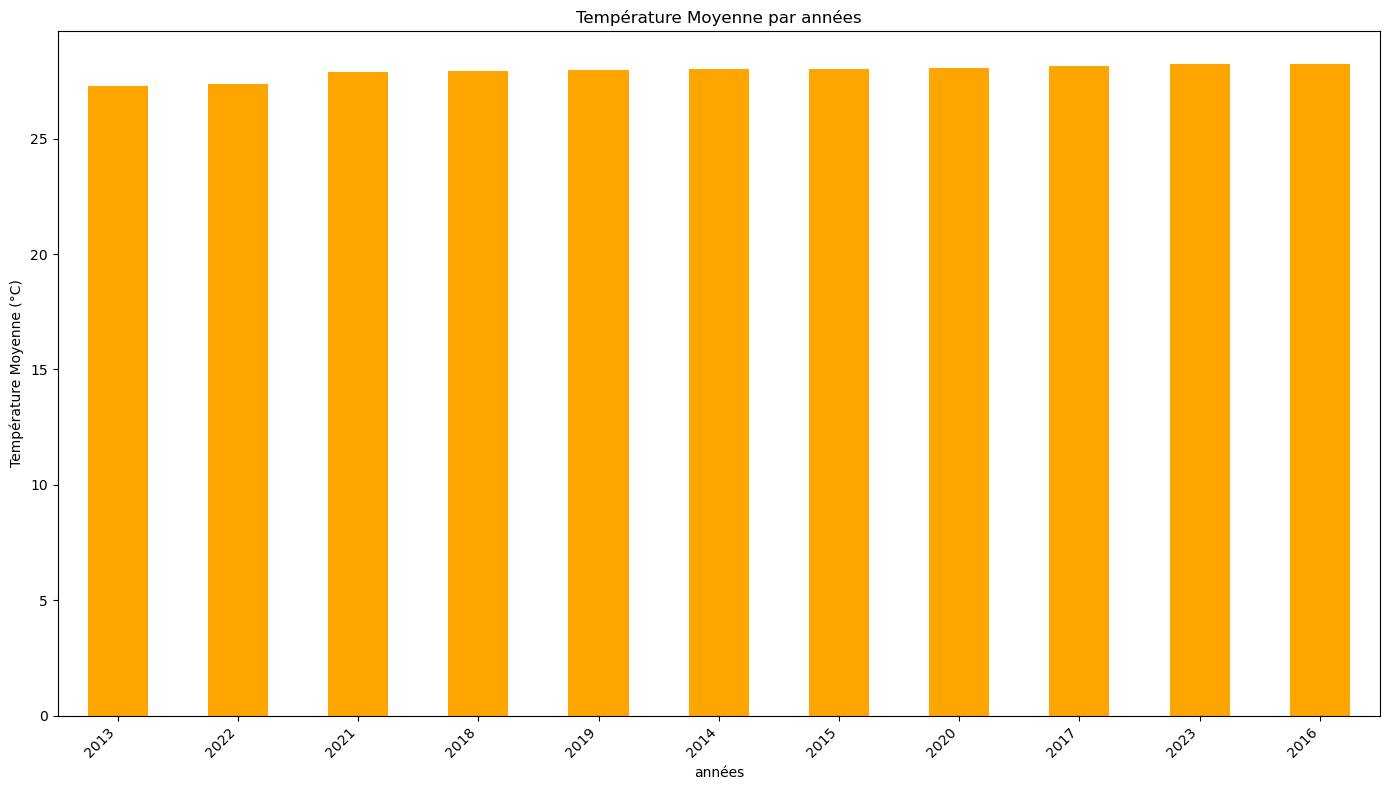

In [59]:
# Calcul de la température moyenne par pays
df_10['annee'] = pd.to_datetime(df_10['date']).dt.year

temp_moyenne_pays = df_10.groupby('annee')['temp_moyenne_c'].mean()

# un graphique des températures moyennes par pays
plt.figure(figsize=(14, 8))
temp_moyenne_pays.sort_values().plot(kind='bar', color='orange')
plt.title("Température Moyenne par années")
plt.xlabel("années")
plt.ylabel("Température Moyenne (°C)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Affichage
plt.show()

D'une année à l'autre, les températures au sein de la CEDEAO montrent une variation relativement faible. En dépit des différences individuelles entre les pays, comme les températures plus basses enregistrées au Cap-Vert et les valeurs plus élevées au Niger, les fluctuations annuelles restent limitées. Cela suggère que, bien que des tendances saisonnières et des événements climatiques puissent survenir, l'ensemble de la région maintient une homogénéité dans ses conditions thermiques.

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h2 class="styled-subtitle"><a id="anal_prep_my_pays">4.3 Analyse de la moyenne des précipitations par pays</a></h2>


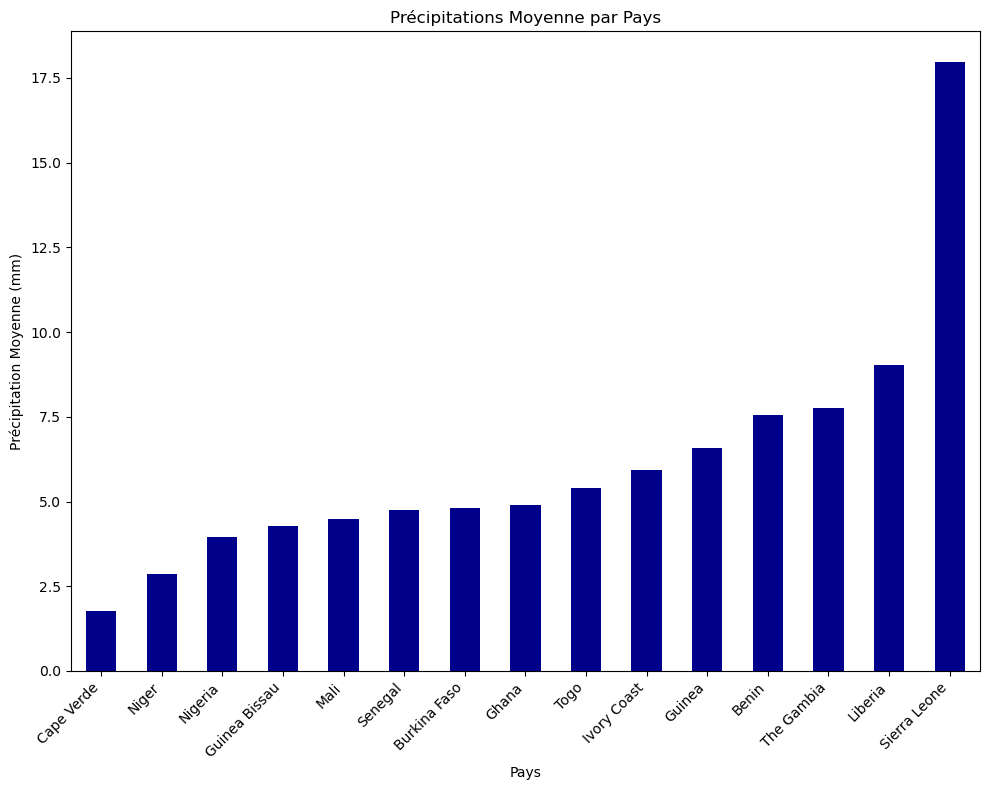

In [81]:
# Calcul de la précipitation moyenne par pays
pre_moyenne_pays = df_10.groupby('pays')['precipitation_mm'].mean()

#  graphique des températures moyennes par pays
plt.figure(figsize=(10, 8))
pre_moyenne_pays.sort_values().plot(kind='bar', color='darkblue')
plt.title("Précipitations Moyenne par Pays")
plt.xlabel("Pays")
plt.ylabel("Précipitation Moyenne (mm)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Affichage
plt.show()

Le graphique montrant le niveau moyen des précipitations dans la zone de la CEDEAO met en évidence la Sierra Leone comme detenteur des records des précipitations dans la Zone. Contrairement au Cap vert et au Niger qui enregistrent les précipitations les plus basses.

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h2 class="styled-subtitle"><a id="anal_prep_my_annee">4.4 Analyse des précipitations moyennes par années</a></h2>


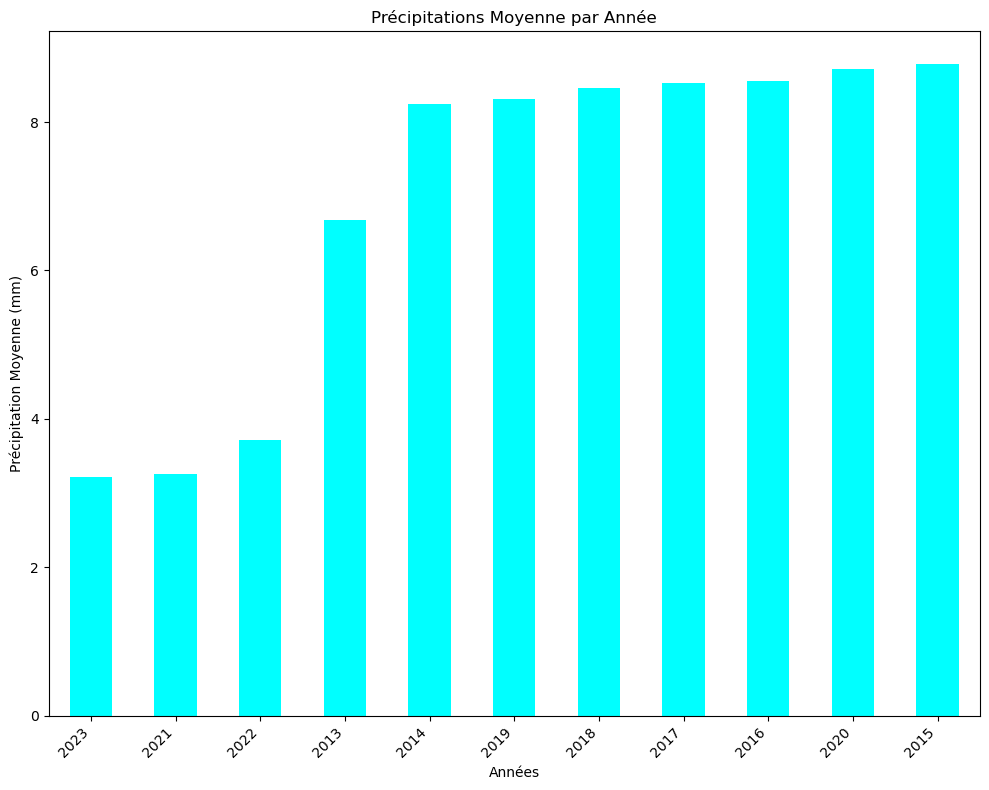

In [82]:
# Calcul de la précipitation moyenne par année
pre_moyenne_pays = df_10.groupby('annee')['precipitation_mm'].mean()

#  graphique des températures moyennes par pays
plt.figure(figsize=(10, 8))
pre_moyenne_pays.sort_values().plot(kind='bar', color='cyan')
plt.title("Précipitations Moyenne par Année")
plt.xlabel("Années")
plt.ylabel("Précipitation Moyenne (mm)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Affichage
plt.show()

De manière générale , les précipitations dans l'union variaient entre 7 mm et 10 mm dans la péride de 2013 à 2015. Cependant, à partir de 2021, on constate une baisse des précipitations qui décroit jusque dans l'intervalle de 3mm à4 mm.

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h2 class="styled-subtitle"><a id="anal_prep_annee_pays">4.5 Précipitation annuelle par pays</a></h2>


In [84]:

moyennes_annuelles = df_10.groupby(['pays', 'annee'])['precipitation_mm'].mean().reset_index()# moyenne des précipitations par année et par pays
moyenne_2013 = moyennes_annuelles[moyennes_annuelles['annee'] == 2013] # filtre pour 2013
moyenne_2023 = moyennes_annuelles[moyennes_annuelles['annee'] == 2023]# filtre pour 2023
# renommer les colonnes des nouveaux dataframes
moyenne_2013.rename(columns={'precipitation_mm': 'precipitation_2013'}, inplace=True)
moyenne_2023.rename(columns={'precipitation_mm': 'precipitation_2023'}, inplace=True)
# Fusion
variation_df = pd.merge(moyenne_2013, moyenne_2023, on='pays')

# Calcul de la variation en pourcentage
variation_df['variation_%'] = ((variation_df['precipitation_2023'] - variation_df['precipitation_2013']) / variation_df['precipitation_2013']) * 100

# Affichage
print(variation_df[['pays', 'precipitation_2013', 'precipitation_2023', 'variation_%']])

             pays  precipitation_2013  precipitation_2023  variation_%
0           Benin            5.595775            6.613006    18.178558
1    Burkina Faso            5.702353            2.527865   -55.669798
2      Cape Verde            9.485714            0.455417   -95.198921
3           Ghana            6.432075            3.606528   -43.929020
4          Guinea           12.609211            4.760000   -62.249817
5   Guinea Bissau                 NaN            3.353347          NaN
6     Ivory Coast            5.983447            3.424583   -42.765708
7         Liberia            8.244156            8.524583     3.401531
8            Mali            4.990291            1.614882   -67.639529
9           Niger            3.669231            1.147214   -68.734196
10        Nigeria            4.023077            2.980987   -25.902805
11        Senegal            7.047280            1.842344   -73.857380
12   Sierra Leone           11.563043           11.407500    -1.345178
13    

C:\Users\HP\AppData\Local\Temp\ipykernel_452\1445909807.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moyenne_2013.rename(columns={'precipitation_mm': 'precipitation_2013'}, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_452\1445909807.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moyenne_2023.rename(columns={'precipitation_mm': 'precipitation_2023'}, inplace=True)


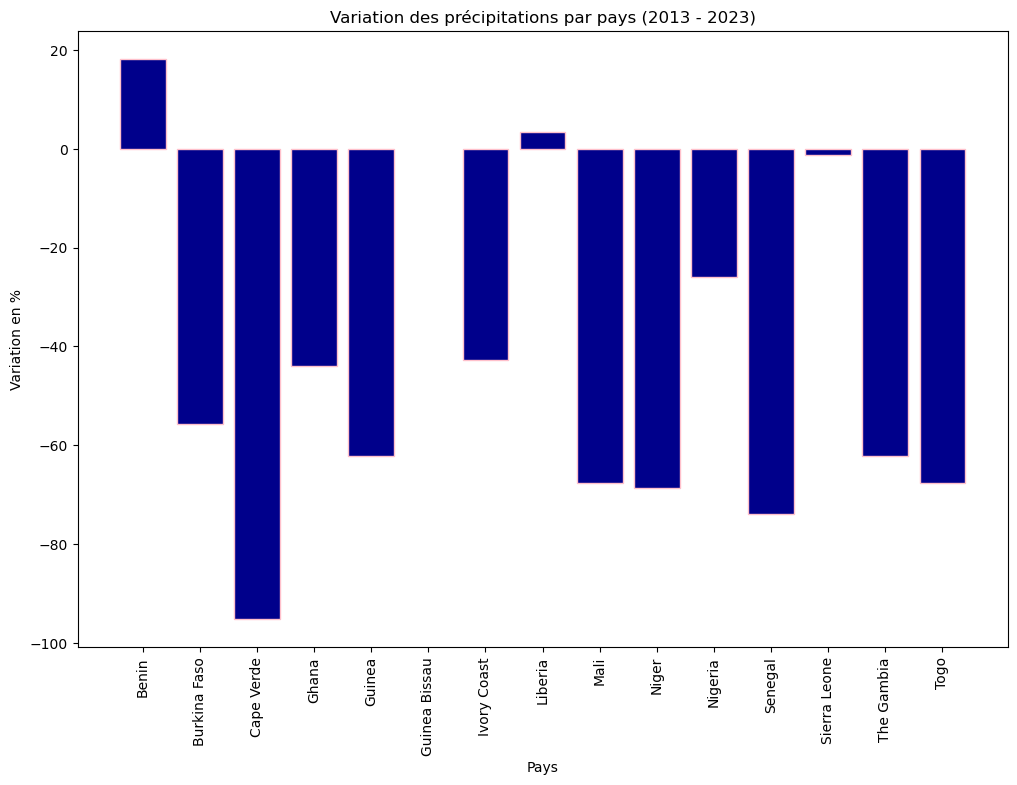

In [85]:
#  l'histogramme des variations par pays
plt.figure(figsize=(12, 8))
plt.bar(variation_df['pays'], variation_df['variation_%'], color='darkblue', edgecolor='pink')
plt.xticks(rotation=90)  # pivot des noms des pays pour une meilleure lisibilité
plt.title("Variation des précipitations par pays (2013 - 2023)")
plt.xlabel("Pays")
plt.ylabel("Variation en %")
plt.show()

Le graphique des variations des précipitations de 2013 à 2023 dans les pays de la CEDEAO met en lumière une tendance générale de diminution des précipitations dans la Zone. Seuls le Bénin et le Liberia montrent une variation positive, ce qui signifie que ces deux pays ont connu une légère augmentation des précipitations au cours de cette période. En revanche, tous les autres pays de la CEDEAO affichent des variations négatives, indiquant une réduction des précipitations. Cette diminution est particulièrement marquée pour le Cap-Vert, qui enregistre une chute notable avoisinant les -95%.

Nous allons nous interresser donc maintenant à la variation par année pour chaque pays.

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h2 class="styled-subtitle"><a id="anal_prep_var_annee_cedeao">4.6 Analyse de la variation annuelle de la précipitation dans la CEDEAO</a></h2>


In [86]:
# Calcul de la variation d'une année à l'autre
from tabulate import tabulate
moyennes_an = df_10.groupby([ 'annee'])['precipitation_mm'].mean().reset_index()
moyennes_an['variation_p'] = moyennes_an['precipitation_mm'].diff()

# Calcul de la variation en pourcentage
moyennes_an['variation_%'] = (moyennes_an['variation_p'] / moyennes_an['precipitation_mm'].shift(1)) * 100

# Affichage
print(tabulate(moyennes_an, headers='keys', tablefmt='pretty', floatfmt=".3f"))


+----+--------+--------------------+----------------------+---------------------+
|    | annee  |  precipitation_mm  |     variation_p      |     variation_%     |
+----+--------+--------------------+----------------------+---------------------+
| 0  | 2013.0 |  6.68304289544236  |         nan          |         nan         |
| 1  | 2014.0 |  8.24752646359905  |  1.5644835681566898  | 23.409749011541166  |
| 2  | 2015.0 | 8.782665406427222  |  0.5351389428281728  | 6.4884780326567055  |
| 3  | 2016.0 | 8.552568521253898  | -0.2300968851733245  | -2.619898112080392  |
| 4  | 2017.0 |  8.53064631956912  | -0.02192220168477732 | -0.2563230172350995 |
| 5  | 2018.0 | 8.452048807138954  | -0.0785975124301661  | -0.9213547190423906 |
| 6  | 2019.0 |  8.31353704032688  | -0.13851176681207455 | -1.638795160471408  |
| 7  | 2020.0 | 8.714039566049776  |  0.4005025257228958  |  4.817474485049608  |
| 8  | 2021.0 | 3.251994451884446  | -5.4620451141653295  | -62.680976747519736 |
| 9  | 2022.0 | 

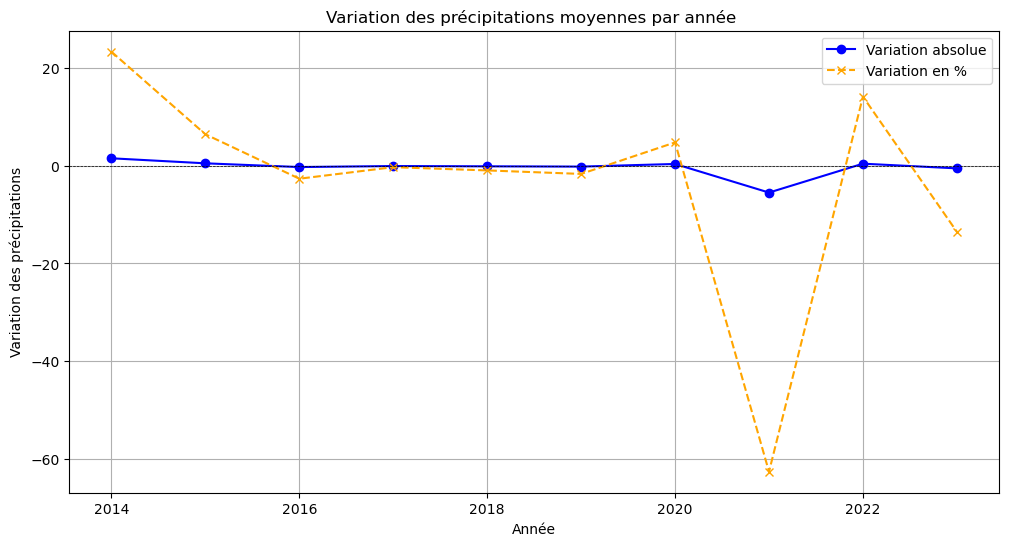

In [87]:
plt.figure(figsize=(12, 6))
plt.plot(moyennes_an['annee'], moyennes_an['variation_p'], marker='o', linestyle='-', color='blue', label='Variation absolue')
plt.plot(moyennes_an['annee'], moyennes_an['variation_%'], marker='x', linestyle='--', color='orange', label='Variation en %')

#  labels et un titre
plt.title("Variation des précipitations moyennes par année ")
plt.xlabel("Année")
plt.ylabel("Variation des précipitations")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Ligne horizontale  y=0 pour référence
plt.legend()
plt.grid()

# Affichage
plt.show()

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h2 class="styled-subtitle"><a id="anal_temp_moy_annee_cedeao">4.7 Analyse de la température moyenne annuelle dans la CEDEAO</a></h2>


In [88]:
moyennes_an_t = df_10.groupby([ 'annee'])['temp_moyenne_c'].mean().reset_index() # dataframe de la moyenne de la température par années
moyennes_an_t['variation_t'] = moyennes_an_t['temp_moyenne_c'].diff() # calcul de la variation absolu

# les résultats
print(tabulate(moyennes_an, headers='keys', tablefmt='pretty', floatfmt=".3f"))

+----+--------+--------------------+----------------------+---------------------+
|    | annee  |  precipitation_mm  |     variation_p      |     variation_%     |
+----+--------+--------------------+----------------------+---------------------+
| 0  | 2013.0 |  6.68304289544236  |         nan          |         nan         |
| 1  | 2014.0 |  8.24752646359905  |  1.5644835681566898  | 23.409749011541166  |
| 2  | 2015.0 | 8.782665406427222  |  0.5351389428281728  | 6.4884780326567055  |
| 3  | 2016.0 | 8.552568521253898  | -0.2300968851733245  | -2.619898112080392  |
| 4  | 2017.0 |  8.53064631956912  | -0.02192220168477732 | -0.2563230172350995 |
| 5  | 2018.0 | 8.452048807138954  | -0.0785975124301661  | -0.9213547190423906 |
| 6  | 2019.0 |  8.31353704032688  | -0.13851176681207455 | -1.638795160471408  |
| 7  | 2020.0 | 8.714039566049776  |  0.4005025257228958  |  4.817474485049608  |
| 8  | 2021.0 | 3.251994451884446  | -5.4620451141653295  | -62.680976747519736 |
| 9  | 2022.0 | 

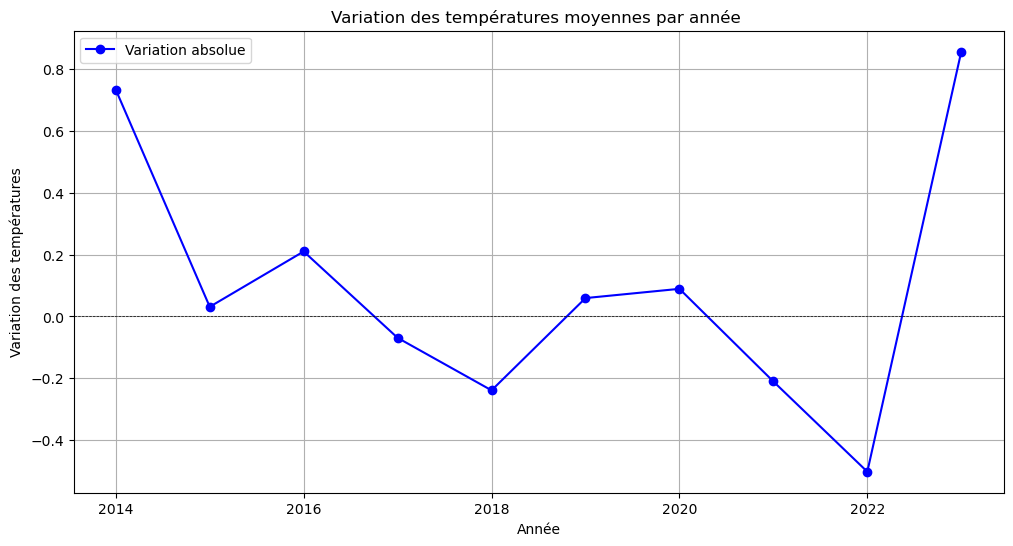

In [89]:
# courbe de la de la variation de la précipitation
plt.figure(figsize=(12, 6))
plt.plot(moyennes_an_t['annee'], moyennes_an_t['variation_t'], marker='o', linestyle='-', color='blue', label='Variation absolue')

#  labels et un titre
plt.title("Variation des températures moyennes par année ")
plt.xlabel("Année")
plt.ylabel("Variation des températures")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Ligne horizontale à y=0 pour référence
plt.legend()
plt.grid()

# Affichage
plt.show()

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h2 class="styled-subtitle"><a id="anal_rel_temp_prep">4.8 Relation entre variation des précipitations et variations et variations des températures</a></h2>


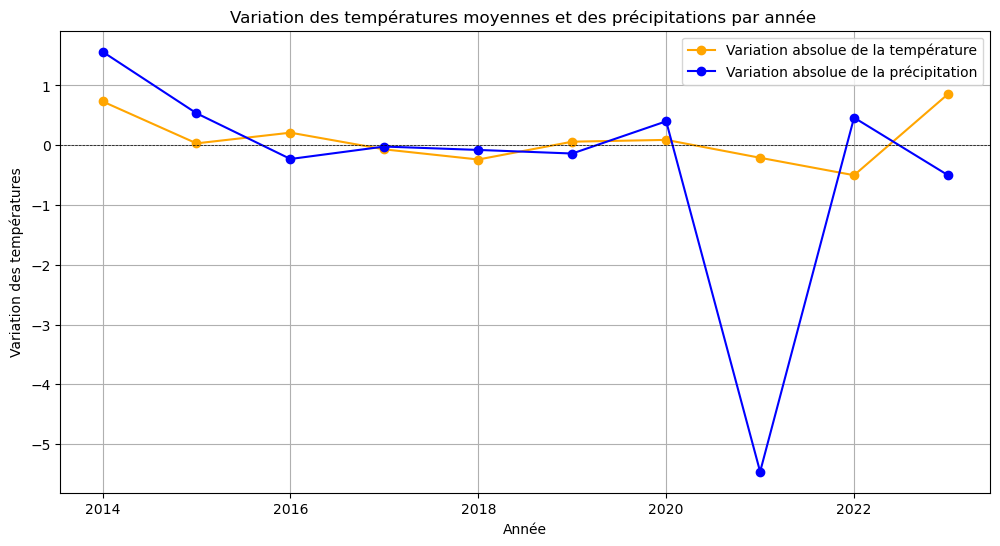

In [91]:
# courbes de variation des températures e des pécipitations
plt.figure(figsize=(12, 6))
plt.plot(moyennes_an_t['annee'], moyennes_an_t['variation_t'], marker='o', linestyle='-', color='orange', label='Variation absolue de la température')
plt.plot(moyennes_an['annee'], moyennes_an['variation_p'], marker='o', linestyle='-', color='blue', label='Variation absolue de la précipitation')

#  labels et un titre
plt.title("Variation des températures moyennes et des précipitations par année ")
plt.xlabel("Année")
plt.ylabel("Variation des températures")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Ligne horizontale à y=0 pour référence
plt.legend()
plt.grid()

# Afficher le graphique
plt.show()

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h2 class="styled-subtitle"><a id="anal_cor_temp_prep">4.9 Corrélation entre température et précipitations</a></h2>


In [92]:
# Calcul de la corrélation entre la température et les précipitations
correlation_matrix = df_10[['temp_moyenne_c', 'precipitation_mm']].corr()
correlation_pandas = correlation_matrix.loc['temp_moyenne_c', 'precipitation_mm']
print(f"Corrélation : {correlation_pandas}")


Corrélation : -0.1866059759149078


Le coefficient de corrélation de -0,1866 indique une faible corrélation négative entre les températures et les précipitations dans cet ensemble de données. Cela signifie qu'en moyenne, une légère tendance inverse est observée : lorsque la température augmente, les précipitations tendent à diminuer, et inversement. Toutefois, cette relation est peu marquée en raison de la proximité du coefficient à zéro. Cela suggère qu'il n'existe pas de relation linéaire forte entre les deux variables, indiquant que les précipitations peuvent être influencées par d'autres facteurs indépendants de la température ou que la relation entre température et précipitations pourrait être non linéaire ou contextuelle, par exemple saisonnière.Ce coefficient montre une tendance inverse faible entre les deux variables, mais cette relation reste trop faible pour être considérée comme significative dans des prédictions fiables.

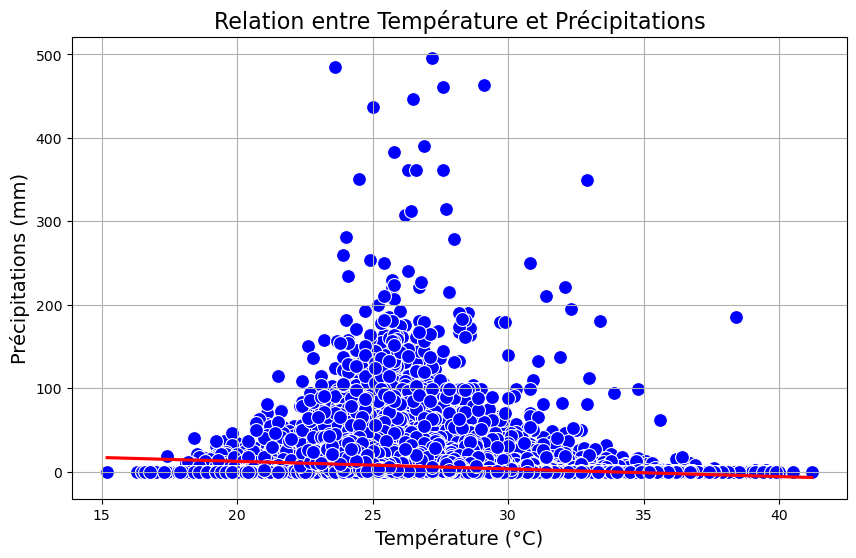

In [93]:
# diagramme de dispersion
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp_moyenne_c', y='precipitation_mm', data=df_10, color='blue', s=100)

#  ligne de régression
sns.regplot(x='temp_moyenne_c', y='precipitation_mm', data=df_10, scatter=False, color='red')

# Personnalisation du graphique
plt.title("Relation entre Température et Précipitations", fontsize=16)
plt.xlabel("Température (°C)", fontsize=14)
plt.ylabel("Précipitations (mm)", fontsize=14)
plt.grid(True)

# Affichage du graphique
plt.show()



**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h1 class = "styled-title"><a id="PREVISION">5. PREVISION</a></h1>

<h2 class="styled-subtitle"><a id="prev_var">5.1 Prévision de la variation des précipitations par pays</a></h2>


In [94]:
# calcul de la corrélation entre année et variation de la précipitation annuelle
correlation_matrix = moyennes_an[['annee', 'variation_p']].corr()
correlation_pandas = correlation_matrix.loc['annee', 'variation_p']
print(f"Corrélation  : {correlation_pandas}")


Corrélation  : -0.42827831598540955


D'après les analyses faites plus haut, la variation de la température est une fonction linéaire du temps . Le calcul du coefficient de corrélation montre une corrélation négative ce qui voudrait dire que plus on avance en anné plus la quantité de pluie dans la zone diminue.

C:\Users\HP\AppData\Local\Temp\ipykernel_452\1053947170.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_country.dropna(subset=['variation_p'], inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_452\1053947170.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_country.dropna(subset=['variation_p'], inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_452\1053947170.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

             pays  prediction
0           Benin   -0.836802
1    Burkina Faso   -1.497803
2      Cape Verde   -0.152028
3           Ghana   -1.957009
4          Guinea   -4.884623
5   Guinea Bissau   -5.484673
6     Ivory Coast   -1.853117
7         Liberia   -1.539345
8            Mali   -1.391455
9           Niger   -2.008551
10        Nigeria   -2.671677
11        Senegal   -3.224336
12   Sierra Leone   -5.241332
13     The Gambia   -3.251579
14           Togo   -2.015505


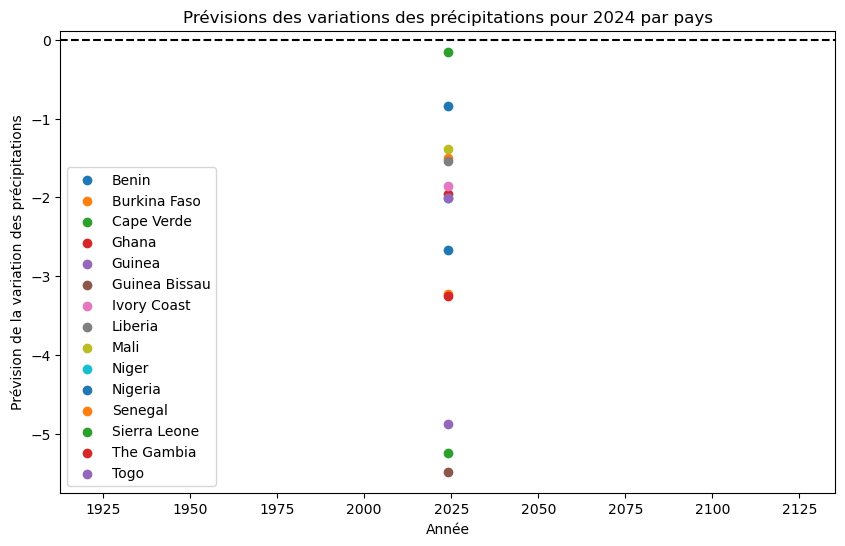

In [95]:
import statsmodels.api as sm
moyennes_annuelles['variation_p'] = moyennes_annuelles['precipitation_mm'].diff() # calcul de la variation absolu pour le dt moyennes_annuelles

# Préparation des prévisions pour chaque pays
resultats_previsions = []

# Boucle à travers chaque pays unique
for pays in moyennes_annuelles['pays'].unique():
    # Filtr des données pour le pays actuel
    data_country = moyennes_annuelles[moyennes_annuelles['pays'] == pays]
    
    # Suppression les lignes avec des variations manquantes (Si tu peux revoir ceci)
    data_country.dropna(subset=['variation_p'], inplace=True)
    
    X = data_country['annee']  # Variable indépendante (année)
    y = data_country['variation_p']  # Variable dépendante (variation)

    # Ajouter une constante pour le terme d'interception
    X = sm.add_constant(X)

    # Ajuster le modèle de régression linéaire
    model = sm.OLS(y, X).fit()

    # Prévision pour l'année 2024
    année_2024 = pd.DataFrame({'const': 1, 'annee': [2024]})  # Préparer les données pour 2024
    prediction = model.predict(année_2024)

    # stockage du  résultat
    resultats_previsions.append({'pays': pays, 'prediction': prediction[0]})

# Converssion les résultats en DataFrame
df_resultats = pd.DataFrame(resultats_previsions)

# Affichage les prévisions pour chaque pays
print(df_resultats)

# Visualisation des résultats pour chaque pays
plt.figure(figsize=(10, 6))
for pays in df_resultats['pays']:
    plt.scatter(2024, df_resultats[df_resultats['pays'] == pays]['prediction'], label=pays)

plt.axhline(0, color='black', linestyle='--')
plt.title("Prévisions des variations des précipitations pour 2024 par pays")
plt.xlabel("Année")
plt.ylabel("Prévision de la variation des précipitations")
plt.legend()
plt.show()

De manière générale, on observe une tendance à la baisse des variations dans les niveaux de précipitations pour chaque pays de la CEDEAO au fil du temps. Cette tendance décroissante dans les variations suggère que les précipitations pourraient continuer de diminuer entre 2023 et 2024. Si cette tendance se poursuit, elle pourrait indiquer un déclin généralisé de la pluviométrie pour cette région, ce qui soulève des questions importantes pour les secteurs dépendants des conditions climatiques, comme l'agriculture et la gestion des ressources en eau.La baisse des précipitations pourrait affecter la sécurité alimentaire, la production agricole, et la disponibilité en eau potable, rendant nécessaire l’anticipation de stratégies d’adaptation. Cette tendance, si elle se confirme, pourrait être attribuée à divers facteurs, notamment les impacts du changement climatique, qui influencent les cycles saisonniers et modifient la répartition des précipitations dans cette zone géographique.

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h1 class = "styled-title"><a id="CONCLUSION">6. CONCLUSION</a></h1>

<p class="styled text">
    Le projet intitulé "Utilisation des Pipelines pour l'Analyse et la Prévision Météorologique en zone CEDEAO" a démontré l'importance cruciale de la collecte, du traitement, de l'analyse des données climatiques et la prévision des variations de températures pour anticiper et atténuer les impacts du changement climatique. Il vient aider   la Stratégie Régionale Climat (SRC) de la CEDEAO à préparer une réponse plus rapide et efficace aux crises climatiques. Les données climatiques sont essentielles pour comprendre et prévoir les événements météorologiques extrêmes, tels que les sécheresses et les inondations, qui affectent l'agriculture, les ressources en eau, la santé publique et les infrastructures. Les technologies de surveillance et d'analyse, comme les données satellitaires et les capteurs, sont indispensables pour recueillir des informations fiables. Grâce aux API nous avons pu interroger ces technologies pour avoir recueillir les données en temps réel. La base finale fut ensuite stockée sur AWS qui offre les capacités de stockage ces données massives. Le processus de construction d'un pipeline ETL (Extract, Transform, Load) en lui-même a permis de structurer les données climatiques en les extrayant, transformant et chargeant dans un format accessible. Ce processus facilite la visualisation dynamique des régions les plus touchées par les événements climatiques (variations de températures et de précipitations), améliorant ainsi la réactivité des politiques publiques. Il est recommandé à la CEDEAO de se doter de ses propres ressources satellitaires afin de mieux anticiper les phénomènes climatiques. Cela garantirait une collecte de données plus fiable et continue, réduisant la dépendance vis-à-vis de sources externes, une réponse rapide aux requêtes sur des API et EN améliorant l'autonomie de la région.


</p>


**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h1 class = "styled-title"><a id="RESSOURCES">7. RESSOURCES</a></h1>


* https://www.kaggle.com/datasets/guillemservera/global-daily-climate-data

* https://www.kaggle.com/code/nilaychauhan/etl-pipelines-tutorial-world-bank-datasets

* https://www.kaggle.com/code/sevgisarac/climate-change

* https://www.kaggle.com/code/whisperingkahuna/geospatial-analysis-of-universities


**[Revenir à la table des matières](#TABLES-DES-MATIERES)**